
> setwd("/users/genomics/xoel/codebases/co_new/results/")

> plotdir <- "Plots/"

> dir.create(plotdir, showWarnings = F)

> library(ggplot2)


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”



> library(ggh4x)

> library(ggpubr)

> library(ggrepel)


Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”



> library(tidyr)


Warning message:
“package ‘tidyr’ was built under R version 4.2.2”



> library(dplyr)


Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





> fig <- function(width, heigth) {
+     options(repr.plot.width = width, repr.plot.height = heigth)
+ }

> CellTypeAnnot <- c("vRG E", "vRG L", "tRG", "oRG E", 
+     "oRG L", "nIPC", "Neu E", "GluN3", "GluN1", "GluN2", "GluN7", 
+     "GluN5", "GluN4", " ..." ... [TRUNCATED] 

> CellTypeOrder <- c("RGC", "vRG", "vtRG", "oRG", "RG E", 
+     "RG L", "vRG E", "vRG L", "tRG", "oRG E", "oRG L", "Neural", 
+     "GluN", "nIPC", " ..." ... [TRUNCATED] 

> CellTypeLabels <- CellTypeOrder

> CellTypeColor <- setNames(c("#bec1d4", "#7d87b9", 
+     "#023fa5", "#d6bcc0", "#bb7784", "#8e063b", "#b5bbe3", "#8595e1", 
+     "#4a6fe3", "#e6afb ..." ... [TRUNCATED] 

> ctinfo <- data.frame(hex = CellTypeColor, Name = factor(names(CellTypeColor))) %>% 
+     mutate(`Common label` = Name)

> plot.celltype <- ggplot(data = ctinfo, mapping = aes(x = 0, 
+     y = Name, fill = `Common label`)) + geom_tile() + scale_fill_manual(values = Cell .... [TRUNCATED] 

> plot.celltype

> write.csv(ctinfo, file =

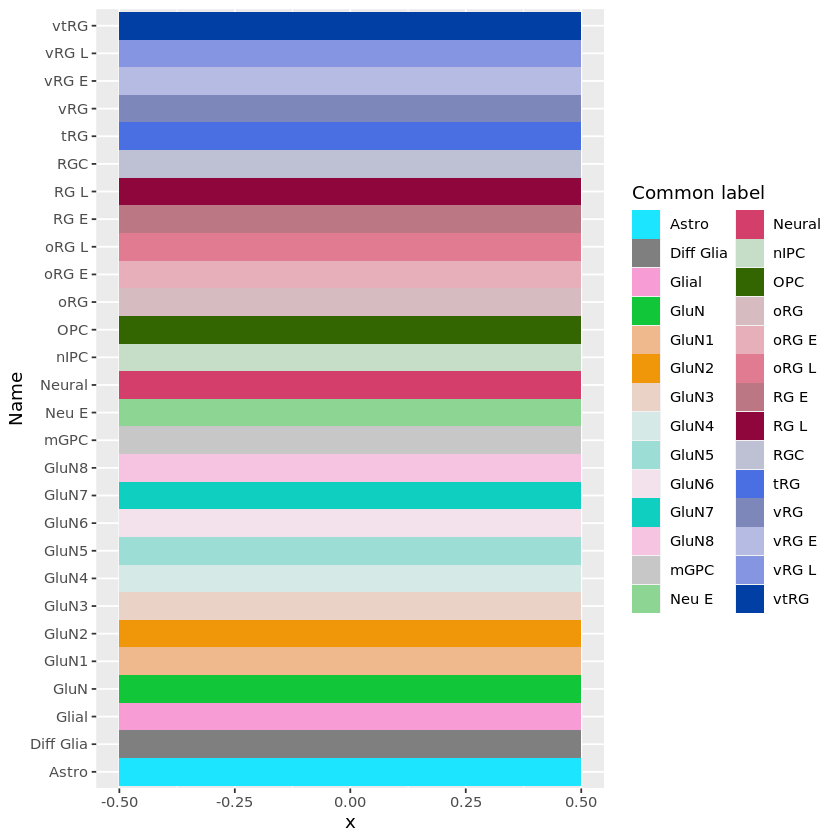

In [1]:
source('0_Rplots.R', echo=T)

### load

In [2]:
df_collection <- lapply(
    readxl::excel_sheets('GenePresence/GenePresence.xlsx'),
    function(x) {
        df <- readxl::read_excel('GenePresence/GenePresence.xlsx', sheet = x) %>% as.data.frame()
        colnames(df)[1] <- 'Gene'
        df$Sample <- x
        if (nrow(df)>length(unique(df$Gene))){
            message(paste0('Found duplicated genes on ', x))
            df <- df[!duplicated(df$Gene),]
        }
        rownames(df) <- df$Gene
        df
    })
names(df_collection) <- readxl::excel_sheets('GenePresence/GenePresence.xlsx')


New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [3]:
head(df_collection[[1]])

Gene     Diseases TFs   Disease regulon Disease core Disease target
RBM15B   RBM15B    TRUE    FALSE FALSE           FALSE        FALSE         
LIFR     LIFR     FALSE    FALSE FALSE           FALSE        FALSE         
S100A16  S100A16  FALSE    FALSE FALSE           FALSE        FALSE         
FGFR1    FGFR1     TRUE    FALSE  TRUE           FALSE         TRUE         
GTF2IRD1 GTF2IRD1  TRUE     TRUE  TRUE            TRUE        FALSE         
MYC      MYC       TRUE     TRUE  TRUE           FALSE         TRUE         
         ASD core BD_2019 core DD core FCDandmTOR core ⋯ vRG E GRN source
RBM15B   FALSE    FALSE        FALSE   FALSE           ⋯ FALSE           
LIFR     FALSE    FALSE        FALSE   FALSE           ⋯ FALSE           
S100A16  FALSE    FALSE        FALSE   FALSE           ⋯ FALSE           
FGFR1    FALSE    FALSE        FALSE   FALSE           ⋯ FALSE           
GTF2IRD1 FALSE    FALSE        FALSE   FALSE           ⋯ FALSE           
MYC      FALSE    FALSE        FALSE   FALSE           ⋯  TRUE           
         vRG E GRN target oRG E GRN source oRG E GRN target OPC GRN source
RBM15B   FALSE            FALSE            FALSE            FALSE         
LIFR     FALSE            FALSE            FALSE            FALSE         
S100A16   TRUE            FALSE             TRUE            FALSE         
FGFR1    FALSE            FALSE            FALSE            FALSE         
GTF2IRD1 FALSE            FALSE            FALSE            FALSE         
MYC      FALSE             TRUE            FALSE             TRUE         
         OPC GRN target Perturbed RNA HV RNA dataset Sample     
RBM15B   FALSE          FALSE     FALSE  TRUE        Gliogenesis
LIFR     FALSE          FALSE     FALSE  TRUE        Gliogenesis
S100A16  FALSE          FALSE      TRUE  TRUE        Gliogenesis
FGFR1    FALSE          FALSE     FALSE  TRUE        Gliogenesis
GTF2IRD1 FALSE          FALSE     FALSE  TRUE        Gliogenesis
MYC      FALSE           TRUE      TRUE  TRUE        Gliogenesis

In [4]:
check_df <- function(df){
    
    chk.df <- df
    chk.df$in.grn <- apply(df[,grepl('GRN', colnames(df)) & !grepl('ATAC', colnames(df))], 1, any)
    
    return(chk.df[chk.df$Perturbed & !chk.df$in.grn, 'Gene'])

}



In [5]:
lapply(df_collection, check_df)


$Gliogenesis
 [1] "RUNX3"   "LHX4"    "TBR1"    "SIM2"    "GATA1"   "EBF1"    "HSF4"   
 [8] "FOXF1"   "VENTX"   "GBX2"    "BHLHE22" "ISL2"    "AIRE"    "ZNF713" 

$NeuralPCW16
[1] "SOX13"  "HNF4A"  "POU2F3"

$NeuralPCW20
[1] "HDX"     "DLX1"    "OLIG1"   "ZKSCAN4" "NFE2"    "BCL3"    "MEOX2"  
[8] "DBX2"    "ZNF713" 

$NeuralPCW21
[1] "OLIG1" "DLX2"  "HOXB2" "EBF3" 

$NeuralPCW24
[1] "NKX3-2" "HOXB2" 

$RGCmaturation
 [1] "PITX3"   "TLX2"    "DLX1"    "TCF23"   "TBX18"   "VAX1"    "LHX4"   
 [8] "SCRT1"   "TBR1"    "SIM2"    "IRX2"    "SOX10"   "ZNF467"  "OLIG1"  
[15] "ZNF549"  "GSX2"    "DLX5"    "DLX2"    "GSX1"    "ONECUT1" "HOXB7"  
[22] "LHX5"    "ELF3"    "FOXD4"   "OSR1"    "MSX2"    "MECOM"   "PITX1"  
[29] "BHLHE22" "ISL2"    "HMX1"    "AIRE"    "NKX3-1"

In [6]:
get_perts <- function(df, whichs='core'){
    if (whichs == 'core'){
        sort(subset(df, Perturbed & (`Peak core` | `Disease core`) )$Gene)
    } else if (whichs == 'regulon'){
        sort(subset(df, Perturbed & (`Peak regulon` | `Disease regulon`) )$Gene)
    }
}
av.cores <- lapply(df_collection, get_perts, whichs='core')
av.cores.un <- sort(unique(unlist(av.cores)))
av.cores <- data.frame(lapply(av.cores[SampleOrder], 
                              function(x){
                                  ifelse(av.cores.un %in% x, av.cores.un, NA)}), 
                       row.names=av.cores.un)

av.cores

RGCmaturation NeuralPCW16 NeuralPCW20 NeuralPCW21 NeuralPCW24
CEBPD  CEBPD         NA          CEBPD       CEBPD       CEBPD      
DLX2   DLX2          NA          DLX2        DLX2        DLX2       
DMRT1  NA            NA          NA          DMRT1       DMRT1      
EGR1   EGR1          EGR1        EGR1        EGR1        EGR1       
EGR2   EGR2          NA          EGR2        EGR2        EGR2       
EGR3   EGR3          NA          EGR3        NA          EGR3       
EP300  EP300         NA          NA          NA          NA         
ETV5   ETV5          ETV5        NA          NA          NA         
FOXO3  NA            NA          NA          NA          FOXO3      
GLIS3  NA            GLIS3       GLIS3       GLIS3       GLIS3      
KLF10  NA            NA          KLF10       KLF10       NA         
KLF4   KLF4          NA          KLF4        KLF4        NA         
KLF6   KLF6          KLF6        KLF6        KLF6        KLF6       
KLF7   KLF7          NA          NA          NA          NA         
KLF8   NA            KLF8        KLF8        KLF8        NA         
MEF2C  MEF2C         MEF2C       MEF2C       MEF2C       MEF2C      
MTF1   NA            NA          MTF1        NA          NA         
NR3C1  NR3C1         NR3C1       NA          NA          NA         
PITX3  PITX3         NA          NA          NA          NA         
PLAGL1 PLAGL1        PLAGL1      NA          NA          NA         
PURA   NA            NA          NA          NA          PURA       
SIN3A  NA            NA          NA          NA          NA         
SOX4   SOX4          SOX4        SOX4        SOX4        SOX4       
SP4    NA            NA          NA          NA          SP4        
SP6    NA            SP6         NA          NA          NA         
SREBF2 NA            NA          NA          NA          SREBF2     
TFDP1  TFDP1         NA          NA          NA          NA         
VDR    NA            NA          NA          NA          VDR        
ZNF667 NA            ZNF667      ZNF667      ZNF667      ZNF667     
       Gliogenesis
CEBPD  CEBPD      
DLX2   DLX2       
DMRT1  NA         
EGR1   EGR1       
EGR2   EGR2       
EGR3   EGR3       
EP300  NA         
ETV5   ETV5       
FOXO3  NA         
GLIS3  NA         
KLF10  KLF10      
KLF4   KLF4       
KLF6   KLF6       
KLF7   KLF7       
KLF8   NA         
MEF2C  MEF2C      
MTF1   NA         
NR3C1  NR3C1      
PITX3  PITX3      
PLAGL1 PLAGL1     
PURA   NA         
SIN3A  SIN3A      
SOX4   SOX4       
SP4    NA         
SP6    NA         
SREBF2 NA         
TFDP1  TFDP1      
VDR    NA         
ZNF667 NA

In [7]:
write.csv(av.cores, 'Available_cores_per_sample.csv', row.names=T)

In [8]:
av.cores

RGCmaturation NeuralPCW16 NeuralPCW20 NeuralPCW21 NeuralPCW24
CEBPD  CEBPD         NA          CEBPD       CEBPD       CEBPD      
DLX2   DLX2          NA          DLX2        DLX2        DLX2       
DMRT1  NA            NA          NA          DMRT1       DMRT1      
EGR1   EGR1          EGR1        EGR1        EGR1        EGR1       
EGR2   EGR2          NA          EGR2        EGR2        EGR2       
EGR3   EGR3          NA          EGR3        NA          EGR3       
EP300  EP300         NA          NA          NA          NA         
ETV5   ETV5          ETV5        NA          NA          NA         
FOXO3  NA            NA          NA          NA          FOXO3      
GLIS3  NA            GLIS3       GLIS3       GLIS3       GLIS3      
KLF10  NA            NA          KLF10       KLF10       NA         
KLF4   KLF4          NA          KLF4        KLF4        NA         
KLF6   KLF6          KLF6        KLF6        KLF6        KLF6       
KLF7   KLF7          NA          NA          NA          NA         
KLF8   NA            KLF8        KLF8        KLF8        NA         
MEF2C  MEF2C         MEF2C       MEF2C       MEF2C       MEF2C      
MTF1   NA            NA          MTF1        NA          NA         
NR3C1  NR3C1         NR3C1       NA          NA          NA         
PITX3  PITX3         NA          NA          NA          NA         
PLAGL1 PLAGL1        PLAGL1      NA          NA          NA         
PURA   NA            NA          NA          NA          PURA       
SIN3A  NA            NA          NA          NA          NA         
SOX4   SOX4          SOX4        SOX4        SOX4        SOX4       
SP4    NA            NA          NA          NA          SP4        
SP6    NA            SP6         NA          NA          NA         
SREBF2 NA            NA          NA          NA          SREBF2     
TFDP1  TFDP1         NA          NA          NA          NA         
VDR    NA            NA          NA          NA          VDR        
ZNF667 NA            ZNF667      ZNF667      ZNF667      ZNF667     
       Gliogenesis
CEBPD  CEBPD      
DLX2   DLX2       
DMRT1  NA         
EGR1   EGR1       
EGR2   EGR2       
EGR3   EGR3       
EP300  NA         
ETV5   ETV5       
FOXO3  NA         
GLIS3  NA         
KLF10  KLF10      
KLF4   KLF4       
KLF6   KLF6       
KLF7   KLF7       
KLF8   NA         
MEF2C  MEF2C      
MTF1   NA         
NR3C1  NR3C1      
PITX3  PITX3      
PLAGL1 PLAGL1     
PURA   NA         
SIN3A  SIN3A      
SOX4   SOX4       
SP4    NA         
SP6    NA         
SREBF2 NA         
TFDP1  TFDP1      
VDR    NA         
ZNF667 NA

In [9]:
av.regenes <- lapply(df_collection, get_perts, whichs='regulon')
av.regenes.un <- sort(unique(unlist(av.regenes)))
av.regenes <- data.frame(lapply(av.regenes[SampleOrder], 
                              function(x){
                                  ifelse(av.regenes.un %in% x, av.regenes.un, NA)}), 
                       row.names=av.regenes.un)


av.regenes

RGCmaturation NeuralPCW16 NeuralPCW20 NeuralPCW21 NeuralPCW24
AHRR     NA            AHRR        NA          NA          NA         
ARHGEF12 NA            ARHGEF12    NA          NA          NA         
ARX      NA            ARX         ARX         ARX         ARX        
ATF3     ATF3          ATF3        ATF3        ATF3        ATF3       
BACH2    BACH2         BACH2       BACH2       BACH2       NA         
BARX2    NA            NA          NA          NA          BARX2      
BATF3    BATF3         NA          NA          NA          BATF3      
BBX      NA            NA          BBX         BBX         BBX        
BCL11A   BCL11A        BCL11A      BCL11A      BCL11A      BCL11A     
BCL11B   BCL11B        BCL11B      BCL11B      BCL11B      BCL11B     
BHLHE41  BHLHE41       BHLHE41     NA          BHLHE41     NA         
CEBPA    NA            CEBPA       NA          NA          NA         
CEBPD    CEBPD         NA          CEBPD       CEBPD       CEBPD      
CHD2     NA            CHD2        NA          NA          NA         
CUX1     NA            NA          NA          NA          CUX1       
CUX2     NA            CUX2        CUX2        CUX2        CUX2       
DDIT3    DDIT3         DDIT3       DDIT3       DDIT3       DDIT3      
DLX1     DLX1          DLX1        DLX1        NA          DLX1       
DLX2     DLX2          NA          DLX2        DLX2        DLX2       
DMRT1    NA            NA          NA          DMRT1       DMRT1      
EBF1     NA            NA          NA          NA          EBF1       
EBF3     NA            NA          NA          EBF3        NA         
EGR1     EGR1          EGR1        EGR1        EGR1        EGR1       
EGR2     EGR2          NA          EGR2        EGR2        EGR2       
EGR3     EGR3          NA          EGR3        NA          EGR3       
ELK3     NA            NA          NA          NA          NA         
EP300    EP300         NA          NA          NA          NA         
ESRRB    NA            NA          NA          NA          NA         
ETS1     NA            NA          NA          NA          NA         
ETV1     ETV1          NA          ETV1        ETV1        ETV1       
⋮        ⋮             ⋮           ⋮           ⋮           ⋮          
SOX6     NA            SOX6        SOX6        SOX6        SOX6       
SP4      NA            NA          NA          NA          SP4        
SP6      NA            SP6         NA          NA          NA         
SREBF2   NA            NA          NA          NA          SREBF2     
TAL1     TAL1          TAL1        NA          NA          TAL1       
TAL2     NA            NA          NA          NA          TAL2       
TBR1     TBR1          TBR1        TBR1        NA          NA         
TBX1     NA            NA          TBX1        NA          NA         
TBX18    TBX18         NA          NA          NA          NA         
TCF4     NA            TCF4        TCF4        TCF4        TCF4       
TCF7L1   NA            NA          TCF7L1      NA          NA         
TCF7L2   NA            TCF7L2      NA          NA          NA         
TEAD1    NA            NA          TEAD1       NA          NA         
TFAP2D   NA            TFAP2D      TFAP2D      TFAP2D      NA         
TFDP1    TFDP1         NA          NA          NA          NA         
THRB     NA            THRB        NA          NA          NA         
VDR      NA            NA          NA          NA          VDR        
XBP1     NA            NA          XBP1        NA          NA         
ZBTB1    NA            NA          NA          NA          ZBTB1      
ZBTB16   NA            NA          NA          ZBTB16      ZBTB16     
ZEB1     ZEB1          ZEB1        ZEB1        ZEB1        ZEB1       
ZFHX3    NA            ZFHX3       ZFHX3       ZFHX3       ZFHX3      
ZFP82    ZFP82         NA          NA          NA          NA         
ZFY      NA            NA          NA          NA          ZFY        
ZNF320   ZNF320        NA        

In [10]:
write.csv(av.regenes, 'Available_regulon_genes_per_sample.csv', row.names=T)

### summarise

In [11]:
summarise_presence <- function(df){

    peak.sample <- rownames(df) %in% names(peak.per.gene)
    peak.sample <- ifelse(peak.sample, peak.per.gene[rownames(df)], 'None')
    
    dis.cols <- c(
        "Disease regulon",
        "Disease core", 
        "Disease target"
    )

    disreg.sum <- apply(df[,dis.cols], 1, function(x){
        if (!any(x)){
            return('None')
        } else if (all(x)){
            return('Both')
        } else if (x[grep('core', names(x))]){
            return('Core')
        } else {
            return('Target')
        }
    })

    peak.cols <- c("Peak regulon", "Peak core", "Peak target")

    peakreg.sum <- apply(df[,peak.cols], 1, function(x){
        if (!any(x)){
            return('None')
        } else if (all(x)){
            return('Both')
        } else if (x[grep('core', names(x))]){
            return('Core')
        } else {
            return('Target')
        }
    })

    reg.cols <- c("Regulon gene", "Regulon core", "Regulon target")

    reg.sum <- apply(df[,reg.cols], 1, function(x){
        if (!any(x)){
            return('None')
        } else if (all(x)){
            return('Both')
        } else if (x[grep('core', names(x))]){
            return('Core')
        } else {
            return('Target')
        }
    })

    rna.cols <- c("RNA HV", "RNA dataset")

    rna.sum <- apply(df[,rna.cols], 1, function(x){
        if (!any(x)){
            return('Not in dataset')
        } else if (all(x)){
            return('OK')
        } else if (x['RNA dataset']){
            return('Not HV')
        }
    })

    atac.cols <- c("ATAC GRN SOURCE", "ATAC GRN TARGET")

    atac.sum <- apply(df[,atac.cols], 1, function(x){
        if (!any(x)){
            return('Not in network')
        } else if (all(x)){
            return('Both')
        } else if (x['ATAC GRN SOURCE']){
            return('GRN source')
        } else {
            'GRN target'
        }
    })

    grn.cols <- grep('ATAC', grep('GRN', colnames(df), value=T), invert = T, value=T)
    grn.cols.info <- data.frame(t(data.frame(strsplit(grn.cols, split= ' GRN '), row.names=c('CT', 'Role'))), colname=grn.cols)
    grn.cl.sums <- lapply(split(grn.cols.info$colname, grn.cols.info$CT),
           function(x){apply(df[,x], 1, function(y){
               if (all(y)) 'Both' else if (!any(y)) 'Not in network' else if (y[1]) 'GRN source' else 'GRN target'
           })})



    regset.cols <- grep('Disease|Peak|GRN|Regulon', grep('core|target', colnames(df), value=T), invert=T, value=T)
    regset.cols.info <- data.frame(t(data.frame(strsplit(regset.cols, split= ' '), row.names=c('Geneset', 'Role'))), colname=regset.cols)
    regset.sums <- lapply(split(regset.cols.info$colname, regset.cols.info$Geneset),
           function(x){apply(df[,x], 1, function(y){
               if (all(y)) 'Both' else if (!any(y)) 'None' else if (y[1]) 'Core' else 'Target'
           })})
               
    summary.df <- data.frame(
        PeakSample=peak.sample,
        DiseaseRegulon=disreg.sum,
        PeakRegulon=peakreg.sum, 
        Regulon=reg.sum,
        RNA.QC=rna.sum,
        ATAC.QC=atac.sum,
        Perturbed=df$Perturbed,
        DiseaseRisk=df$Diseases,
        grn.cl.sums, regset.sums
              )
               
    summary.df$Sample <- unique(df$Sample)
               
    summary.df <- summary.df %>% mutate(Gene=rownames(summary.df)) %>% reshape2::melt(id.vars=c('Gene', 'Sample'))
               
    summary.df$variable <- gsub(pattern = '[.]$', replacement = '', summary.df$variable)
    cts <- gsub(pattern = '+', replacement = '', fixed=T, unique(grn.cols.info$CT))
               
    summary.df$var.facet <- ''

    summary.df$var.facet <- ifelse(grepl('Regulon', summary.df$variable, fixed=T), 'Regulon role', summary.df$var.facet)
    summary.df$var.facet <- ifelse(grepl('.FGF', summary.df$variable, fixed=T), 'Peak regulons', summary.df$var.facet)
    summary.df$var.facet <- ifelse(grepl('QC|Perturbed', summary.df$variable, fixed=F), 'CellOracle', summary.df$var.facet)
    summary.df$var.facet <- ifelse(summary.df$variable%in%unique(c(cts,gsub(' ', '.', cts))),
                                   'Cluster GRN', summary.df$var.facet)
    summary.df$var.facet <- ifelse(summary.df$variable=="PeakSample", 'Peak Sample', summary.df$var.facet)
    summary.df$var.facet <- ifelse(summary.df$variable=="DiseaseRisk", 'Disease Risk', summary.df$var.facet)
    summary.df$var.facet <- ifelse(summary.df$var.facet=="", 'Disease regulons', summary.df$var.facet)
    summary.df$variable <- gsub(pattern = 'tRG_EOMES', replacement = 'tRG_EOMES+', summary.df$variable, fixed = T)
    
    return(summary.df)
}

In [12]:
df_collection$NeuralPCW24['FOXG1',]

Gene  Diseases TFs  Disease regulon Disease core Disease target ASD core
FOXG1 FOXG1 TRUE     TRUE TRUE            TRUE         TRUE           FALSE   
      BD_2019 core DD core FCDandmTOR core ⋯ vRG E GRN source vRG E GRN target
FOXG1 FALSE        FALSE   FALSE           ⋯ FALSE            FALSE           
      GluN5 GRN source GluN5 GRN target GluN8 GRN source GluN8 GRN target
FOXG1 FALSE            FALSE            FALSE            FALSE           
      Perturbed RNA HV RNA dataset Sample     
FOXG1 FALSE     FALSE  TRUE        NeuralPCW24

In [13]:
sum_collection <- lapply(df_collection, summarise_presence)

In [14]:
long.df <- do.call('rbind', sum_collection)

In [15]:
long.df$Sample <- ifelse(grepl('egulon|Risk|Peak', long.df$var.facet, fixed=F), 'All', long.df$Sample)
long.df <- unique(long.df)

In [16]:
all.perts <- subset(long.df, variable=='Perturbed') %>% 
    group_by(Gene) %>% 
    summarise(value=all(value=='TRUE')) %>%
    mutate(variable='All perturbed', Sample='All', var.facet='CellOracle')

long.df <- rbind(long.df, all.perts[,colnames(long.df)])

### Factor

In [17]:
value.levels <- c(
    names(meta.colors$PeakSample),
    'Core', 'GRN source',
    'Target', 'GRN target',
    'Both', 
    'TRUE', 'FALSE',
    'OK', 'Not HV', 'Not in dataset', 'Not in network',
    'None'
    
)

In [18]:
variable.levels <- c(
    'PeakSample',
    names(meta.colors$PeakSample),
    'DiseaseRisk',
    'All perturbed',
    'DiseaseRegulon', 'PeakRegulon', 'Regulon',
    DiseaseOrder[DiseaseOrder%in%unique(long.df$variable)],
    CellTypeOrder,
    'RNA.QC', 'ATAC.QC', 'Perturbed'
)

In [19]:
var.fix <-sapply(unique(long.df$variable)[grepl('.', unique(long.df$variable), fixed=T) & !unique(long.df$variable) %in%variable.levels], 
       function(x){
           gsub('.', ' ', x, fixed=T)})

long.df$variable <- ifelse(long.df$variable %in% names(var.fix), var.fix[long.df$variable], long.df$variable)

In [20]:
unique(long.df$variable)[!unique(long.df$variable) %in%variable.levels]

character(0)

In [21]:
variable.levels <- variable.levels[variable.levels%in%unique(long.df$variable)]

In [22]:
facet.levels <- c(
    'Peak Sample',
    'Disease Risk',
    'CellOracle',
    'Disease regulons', 'Peak regulons', 'Regulon role',
    'Cluster GRN'
)

In [23]:
sample.levels <- c(

    'All',
    
    SampleOrder
)
sample.levels

[1] "All"           "RGCmaturation" "NeuralPCW16"   "NeuralPCW20"  
[5] "NeuralPCW21"   "NeuralPCW24"   "Gliogenesis"

In [24]:
gene.levels <- c(
    gene.peak.order[gene.peak.order %in% unique(long.df$Gene)],
    unique(long.df$Gene)[!unique(long.df$Gene)%in%gene.peak.order]
)

### Filter genes

In [25]:
filter_genes_summary <- function(df, filters=NULL, sel.genes=NULL, method.union=FALSE){
    
    df <- df
    
    
    if (is.null(sel.genes)){
        
        if (is.null(filters)){
            stop('You must provide either a list of filters or a vector of sellected genes')
        } else {
            
            sel.genes <- if (method.union) {c()} else unique(df$Gene)



            for (filt in names(filters)){    

                if (filt %in% unique(df$variable)){

                    if (method.union) {
                        sel.genes <- c(
                            sel.genes,
                            unique(df$Gene[(df$variable == filt & df$value %in% filters[[filt]])])
                        )
                    } else {
                        sel.genes <- intersect(
                            sel.genes,
                            unique(df$Gene[(df$variable == filt & df$value %in% filters[[filt]])])
                        )
                    }

                } else {
                    print(paste(filt, 'not found in data', paste(unique(df$variable), collapse=';')))
                }

            }
            
        }
    }
    
    df <- subset(df, Gene %in% sel.genes)
    all_pert.genes <- unique(subset(subset(df, variable == 'Perturbed') %>% group_by(Gene) %>% summarize(All=mean(as.logical(value))), All==1)$Gene)

    df[df$variable == 'All perturbed','value'] <- as.character(df[df$variable == 'All perturbed','Gene'] %in% all_pert.genes)
    
    return(df)
}

In [26]:
nrow(long.df)

[1] 565725

In [27]:
SampleInclude <- c('Gliogenesis', 'NeuralPCW20', 'NeuralPCW21', 'NeuralPCW24')

In [28]:
only_selected_samples <- F

if (only_selected_samples){
    long.df <- long.df[!long.df$Sample %in% SampleOrder[!SampleOrder %in% SampleInclude],]
    all_pert.genes <- unique(subset(subset(long.df, variable == 'Perturbed') %>% 
                                    group_by(Gene) %>% 
                                    summarize(All=mean(as.logical(value))), All==1)$Gene)

    long.df[long.df$variable == 'All perturbed','value'] <- as.character(long.df[long.df$variable == 'All perturbed','Gene'] %in% all_pert.genes)
    pdir <- '/users/genomics/xoel/codebases/co_new/results/Plots/GenePresence.Selected/'
} else {
    pdir <- '/users/genomics/xoel/codebases/co_new/results/Plots/GenePresence/'
}

dir.create(pdir, showWarnings = F, recursive = T)
setwd(pdir)

In [29]:
nrow(long.df)

[1] 565725

In [30]:
disregpeakcores.df <- filter_genes_summary(long.df,
                                           method.union=T, 
                                           filters=list(PeakRegulon=c('Core', 'Both'),
                                                        DiseaseRegulon=c('Core', 'Both', 'Target')))

dim(disregpeakcores.df)

[1] 78850     5

In [31]:
disriskregs.df <- filter_genes_summary(long.df,
                                       method.union=T, 
                                       filters=list(Regulon=c('Core', 'Both', 'Target'),
                                                    DiseaseRisk=TRUE))

dim(disriskregs.df)

[1] 460845      5

In [32]:
pert.disriskregs.df <- filter_genes_summary(disriskregs.df, filters=list(Perturbed=TRUE))

dim(pert.disriskregs.df)

[1] 15390     5

In [39]:
cores.df <- filter_genes_summary(long.df, filters=list(Regulon=c('Core', 'Both')))

dim(cores.df)

[1] 8075    5

In [40]:
perturbed.df <- filter_genes_summary(long.df, filters=list(Perturbed=TRUE))

dim(perturbed.df)

[1] 33535     5

In [41]:
pertdis.df <- filter_genes_summary(long.df, filters=list(Perturbed=TRUE, DiseaseRisk=TRUE))

dim(pertdis.df)

[1] 6365    5

In [42]:
pertcores.df <- filter_genes_summary(long.df, filters=list(Perturbed=TRUE,Regulon=c('Core', 'Both')))
dim(pertcores.df)

[1] 2755    5

In [43]:
pertreg.df <- filter_genes_summary(long.df, filters=list(Perturbed=TRUE,Regulon=c('Core', 'Both', 'Target')))
dim(pertreg.df)

[1] 14345     5

In [44]:
disrisk.df <- filter_genes_summary(long.df, filters=list(DiseaseRisk=TRUE))

dim(disrisk.df)

[1] 192280      5

In [45]:
allreg.df <- filter_genes_summary(long.df, filters=list(Regulon=c('Core', 'Both', 'Target')))
dim(allreg.df)

[1] 359195      5

In [46]:
pertcores.df <- filter_genes_summary(long.df, filters=list(Perturbed=TRUE,Regulon=c('Core', 'Both')))
dim(pertcores.df)

[1] 2755    5

In [48]:
asd_deg_genes <- c(
    'ATOH8', 'CEBPZ', 'DBX1', 'FOXD1', 'FOXG1', 'MECOM', 
    'MYC', 'SALL4', 'SON', 'SP8', 'YBX3', 'ZNF24', 'ZNF302',
    'ZNF572', 'ZNF703', 'ZNF718', 'ZNF775')

asd_deg.df <- filter_genes_summary(long.df, sel.genes = asd_deg_genes)
dim(asd_deg.df)

[1] 1615    5

In [33]:
carlo_genes <- c(
    'FOXN3','FOXJ2','NAB2','HES2','ATXN7L3',
    'FOXD2','MAFG','ZNF423','PCGF1','NR1H4',
    'MIF1','UBN1','TFEB','NR0B1','ICSBP'
)

carlo.df <- filter_genes_summary(long.df, sel.genes = carlo_genes)
dim(carlo.df)

[1] 1045    5

In [47]:
nrow(long.df)

[1] 565725

### Plot

In [49]:
#ZNF713

In [34]:
library(ggplot2)
library(ggh4x)
library(ggpubr)

In [35]:
grep('olive', colors(),value=T)

[1] "darkolivegreen"  "darkolivegreen1" "darkolivegreen2" "darkolivegreen3"
 [5] "darkolivegreen4" "olivedrab"       "olivedrab1"      "olivedrab2"     
 [9] "olivedrab3"      "olivedrab4"

In [36]:
val.cols <- c(

    'Core' = 'plum3',
    'Target' = 'cadetblue3',
    
    'GRN source' =  'plum3',
    'GRN target' = 'cadetblue3',
    
    'Both' = 'indianred',
    'None' = 'white',

    'Not in network'='white',
    'Not in dataset'='navyblue',
    'Not HV'='khaki',
    'OK'='olivedrab3',

    'TRUE'='black',
    'FALSE'='white',
    
    
    meta.colors$PeakSample

)


In [37]:
all(long.df$variable %in% variable.levels)

[1] TRUE

In [38]:
all(long.df$var.facet %in% facet.levels)

[1] TRUE

In [39]:
all(long.df$value %in% value.levels)

[1] TRUE

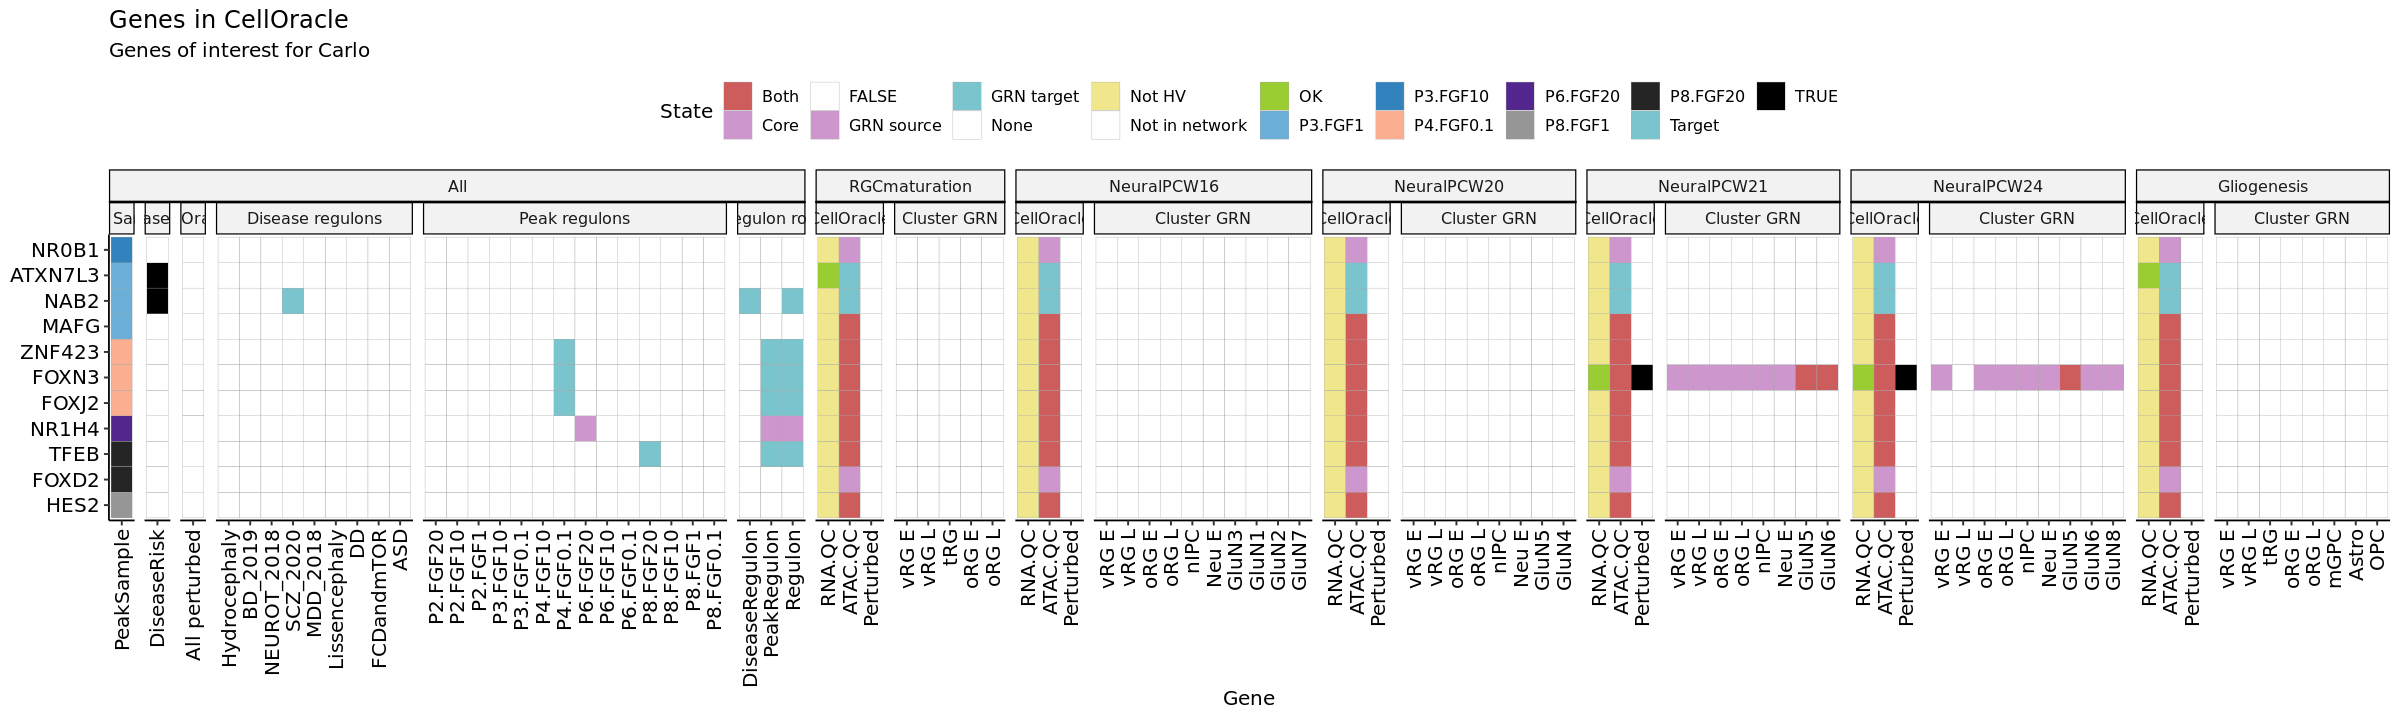

In [43]:
fig(20,6)
p.carlo <- ggplot(carlo.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=value,
    # x=variable, 
    # y=Gene,
    # fill=value
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
    # facet_nested(cols=vars(Sample,
    #                        var.facet), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.carlo <- p.carlo + ggtitle('Genes in CellOracle', subtitle = 'Genes of interest for Carlo')
p.carlo

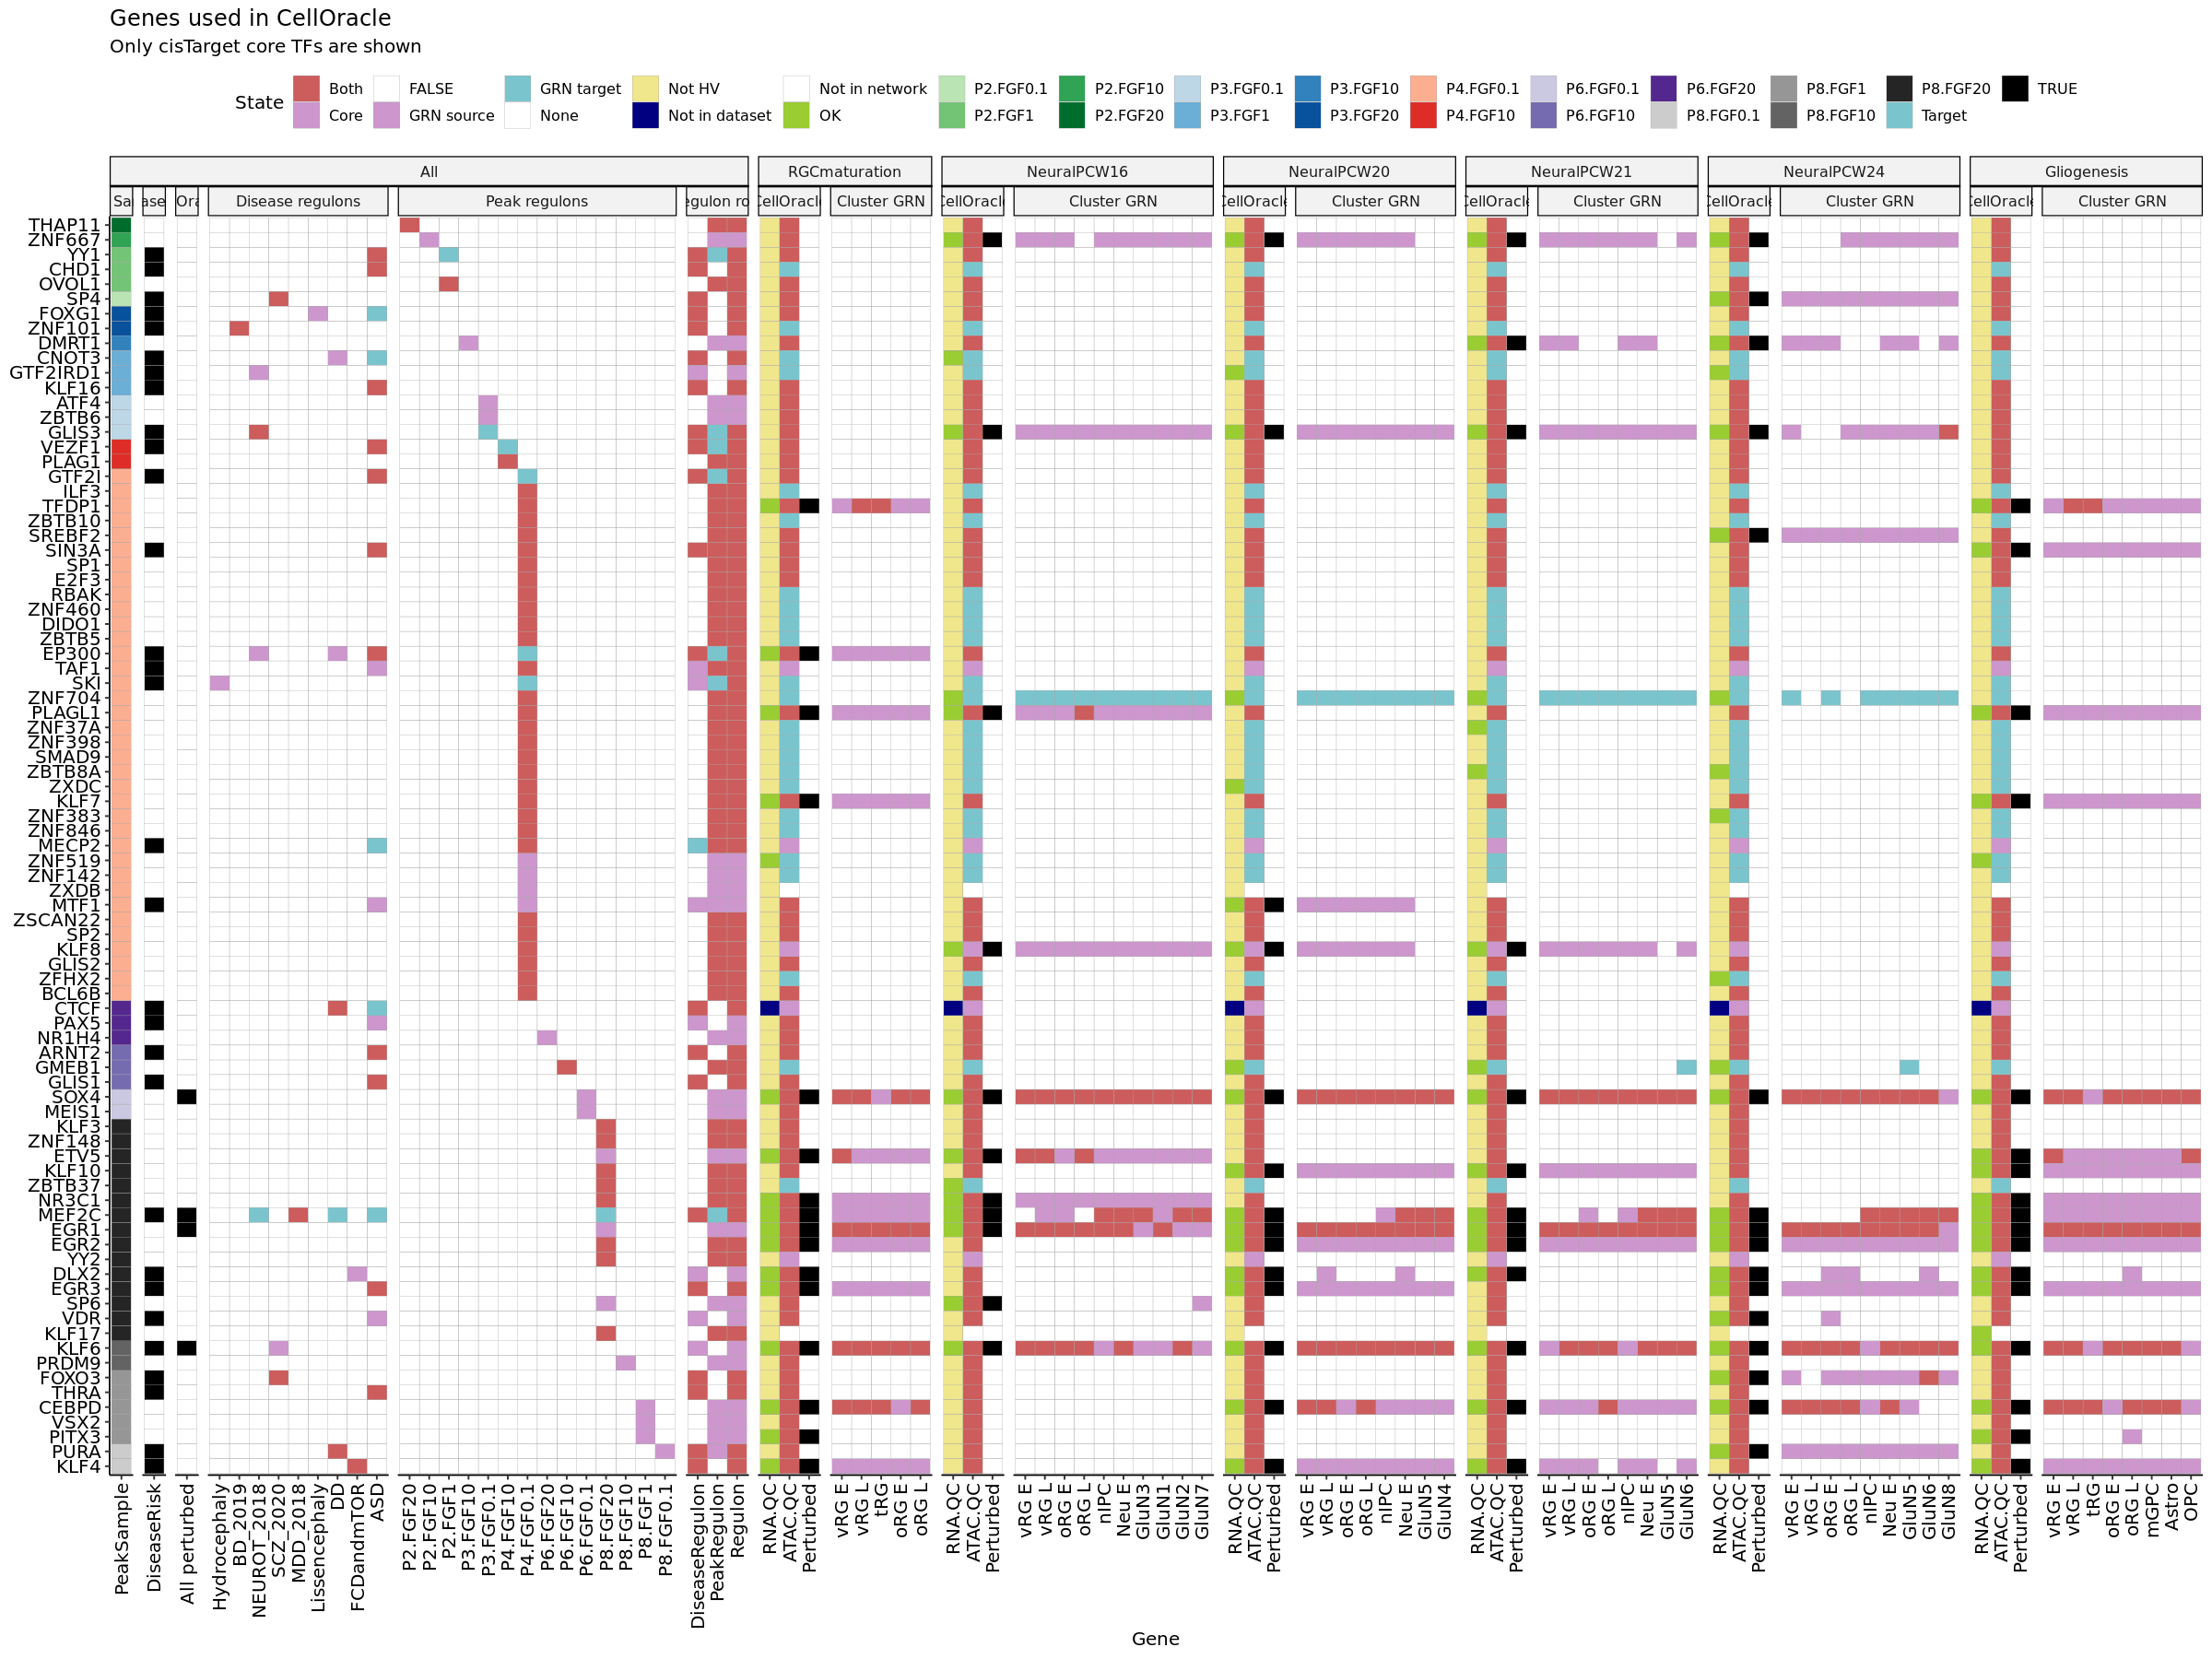

In [150]:
fig(20,15)
p.cores <- ggplot(cores.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=value,
    # x=variable, 
    # y=Gene,
    # fill=value
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
    # facet_nested(cols=vars(Sample,
    #                        var.facet), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.cores <- p.cores + ggtitle('Genes used in CellOracle', subtitle = 'Only cisTarget core TFs are shown')
p.cores

In [113]:
pdf(file = 'GenePresence.Cores.pdf', width = 20, height=15, useDingbats = F)
p.cores
dev.off()

png 
  2

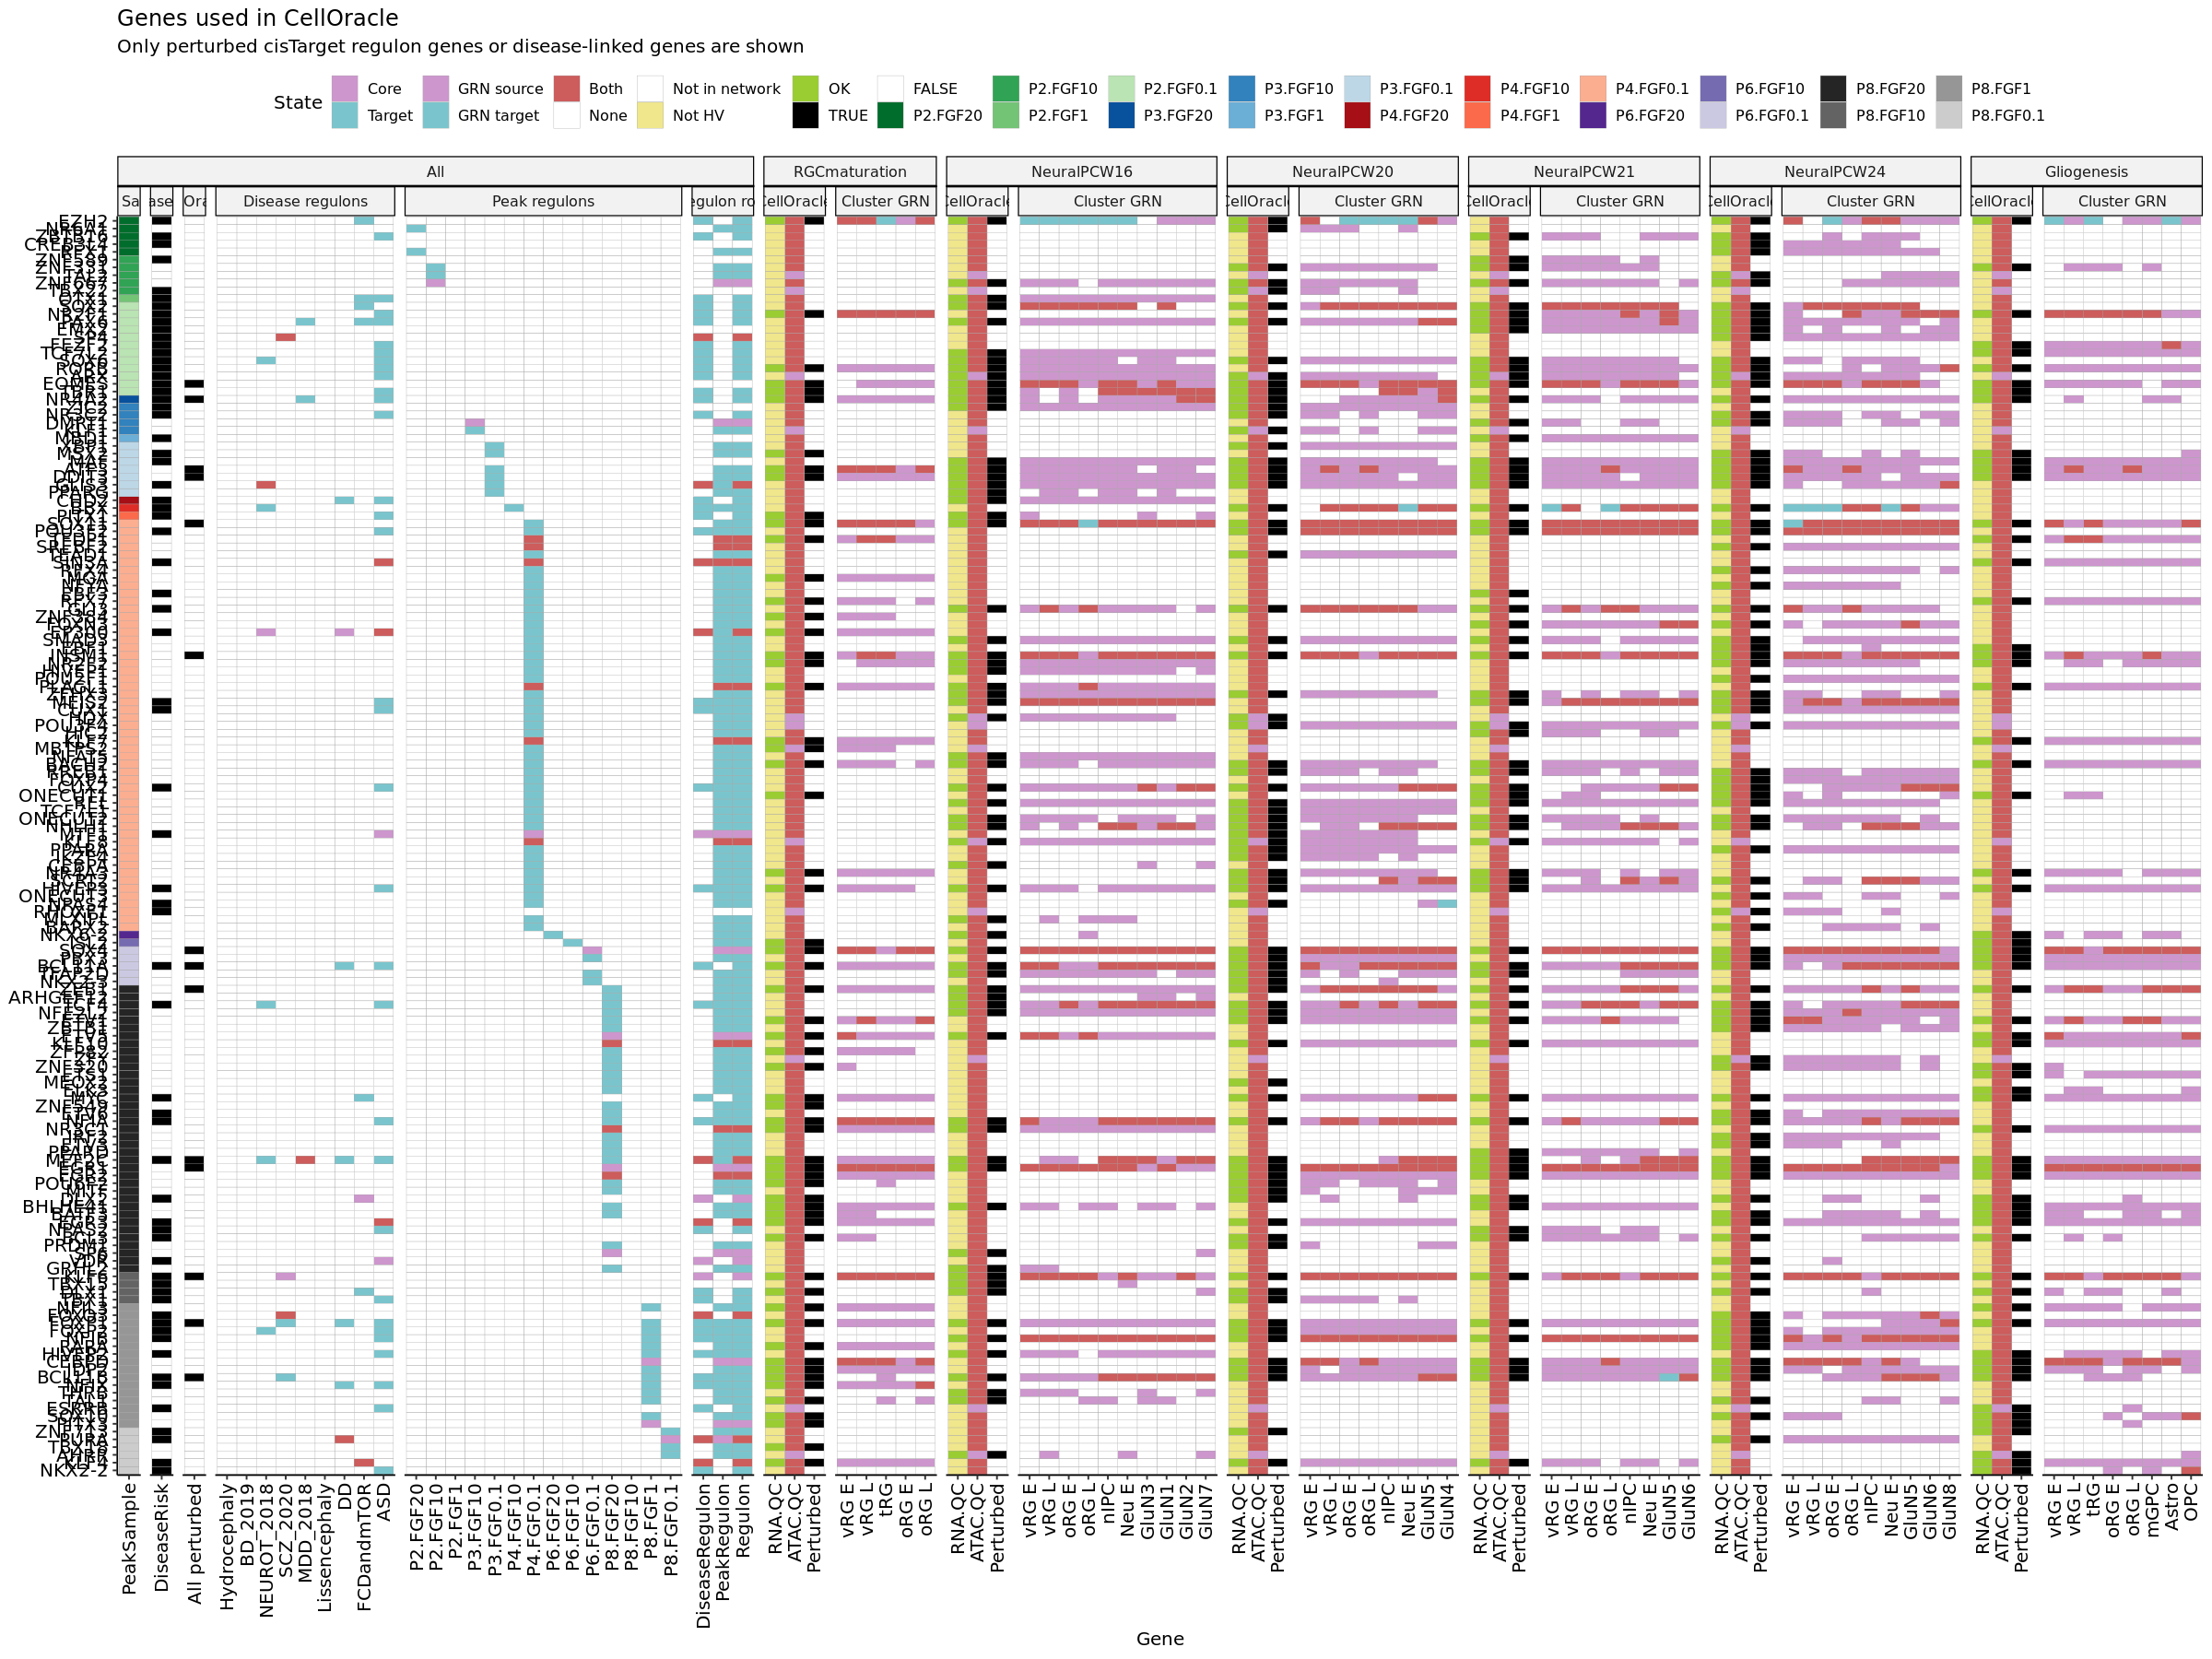

In [114]:
fig(20,15)
p.pert.disriskregs <- ggplot(pert.disriskregs.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
    # x=variable, 
    # y=Gene,
    # fill=value
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
    # facet_nested(cols=vars(Sample,
    #                        var.facet), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.pert.disriskregs <- p.pert.disriskregs + ggtitle('Genes used in CellOracle', subtitle = 'Only perturbed cisTarget regulon genes or disease-linked genes are shown')
p.pert.disriskregs

In [115]:
pdf(file = 'GenePresence.Perturbed.DiseaseRiskorRegulon.pdf', width = 20, height=22, useDingbats = F)
p.pert.disriskregs
dev.off()

png 
  2

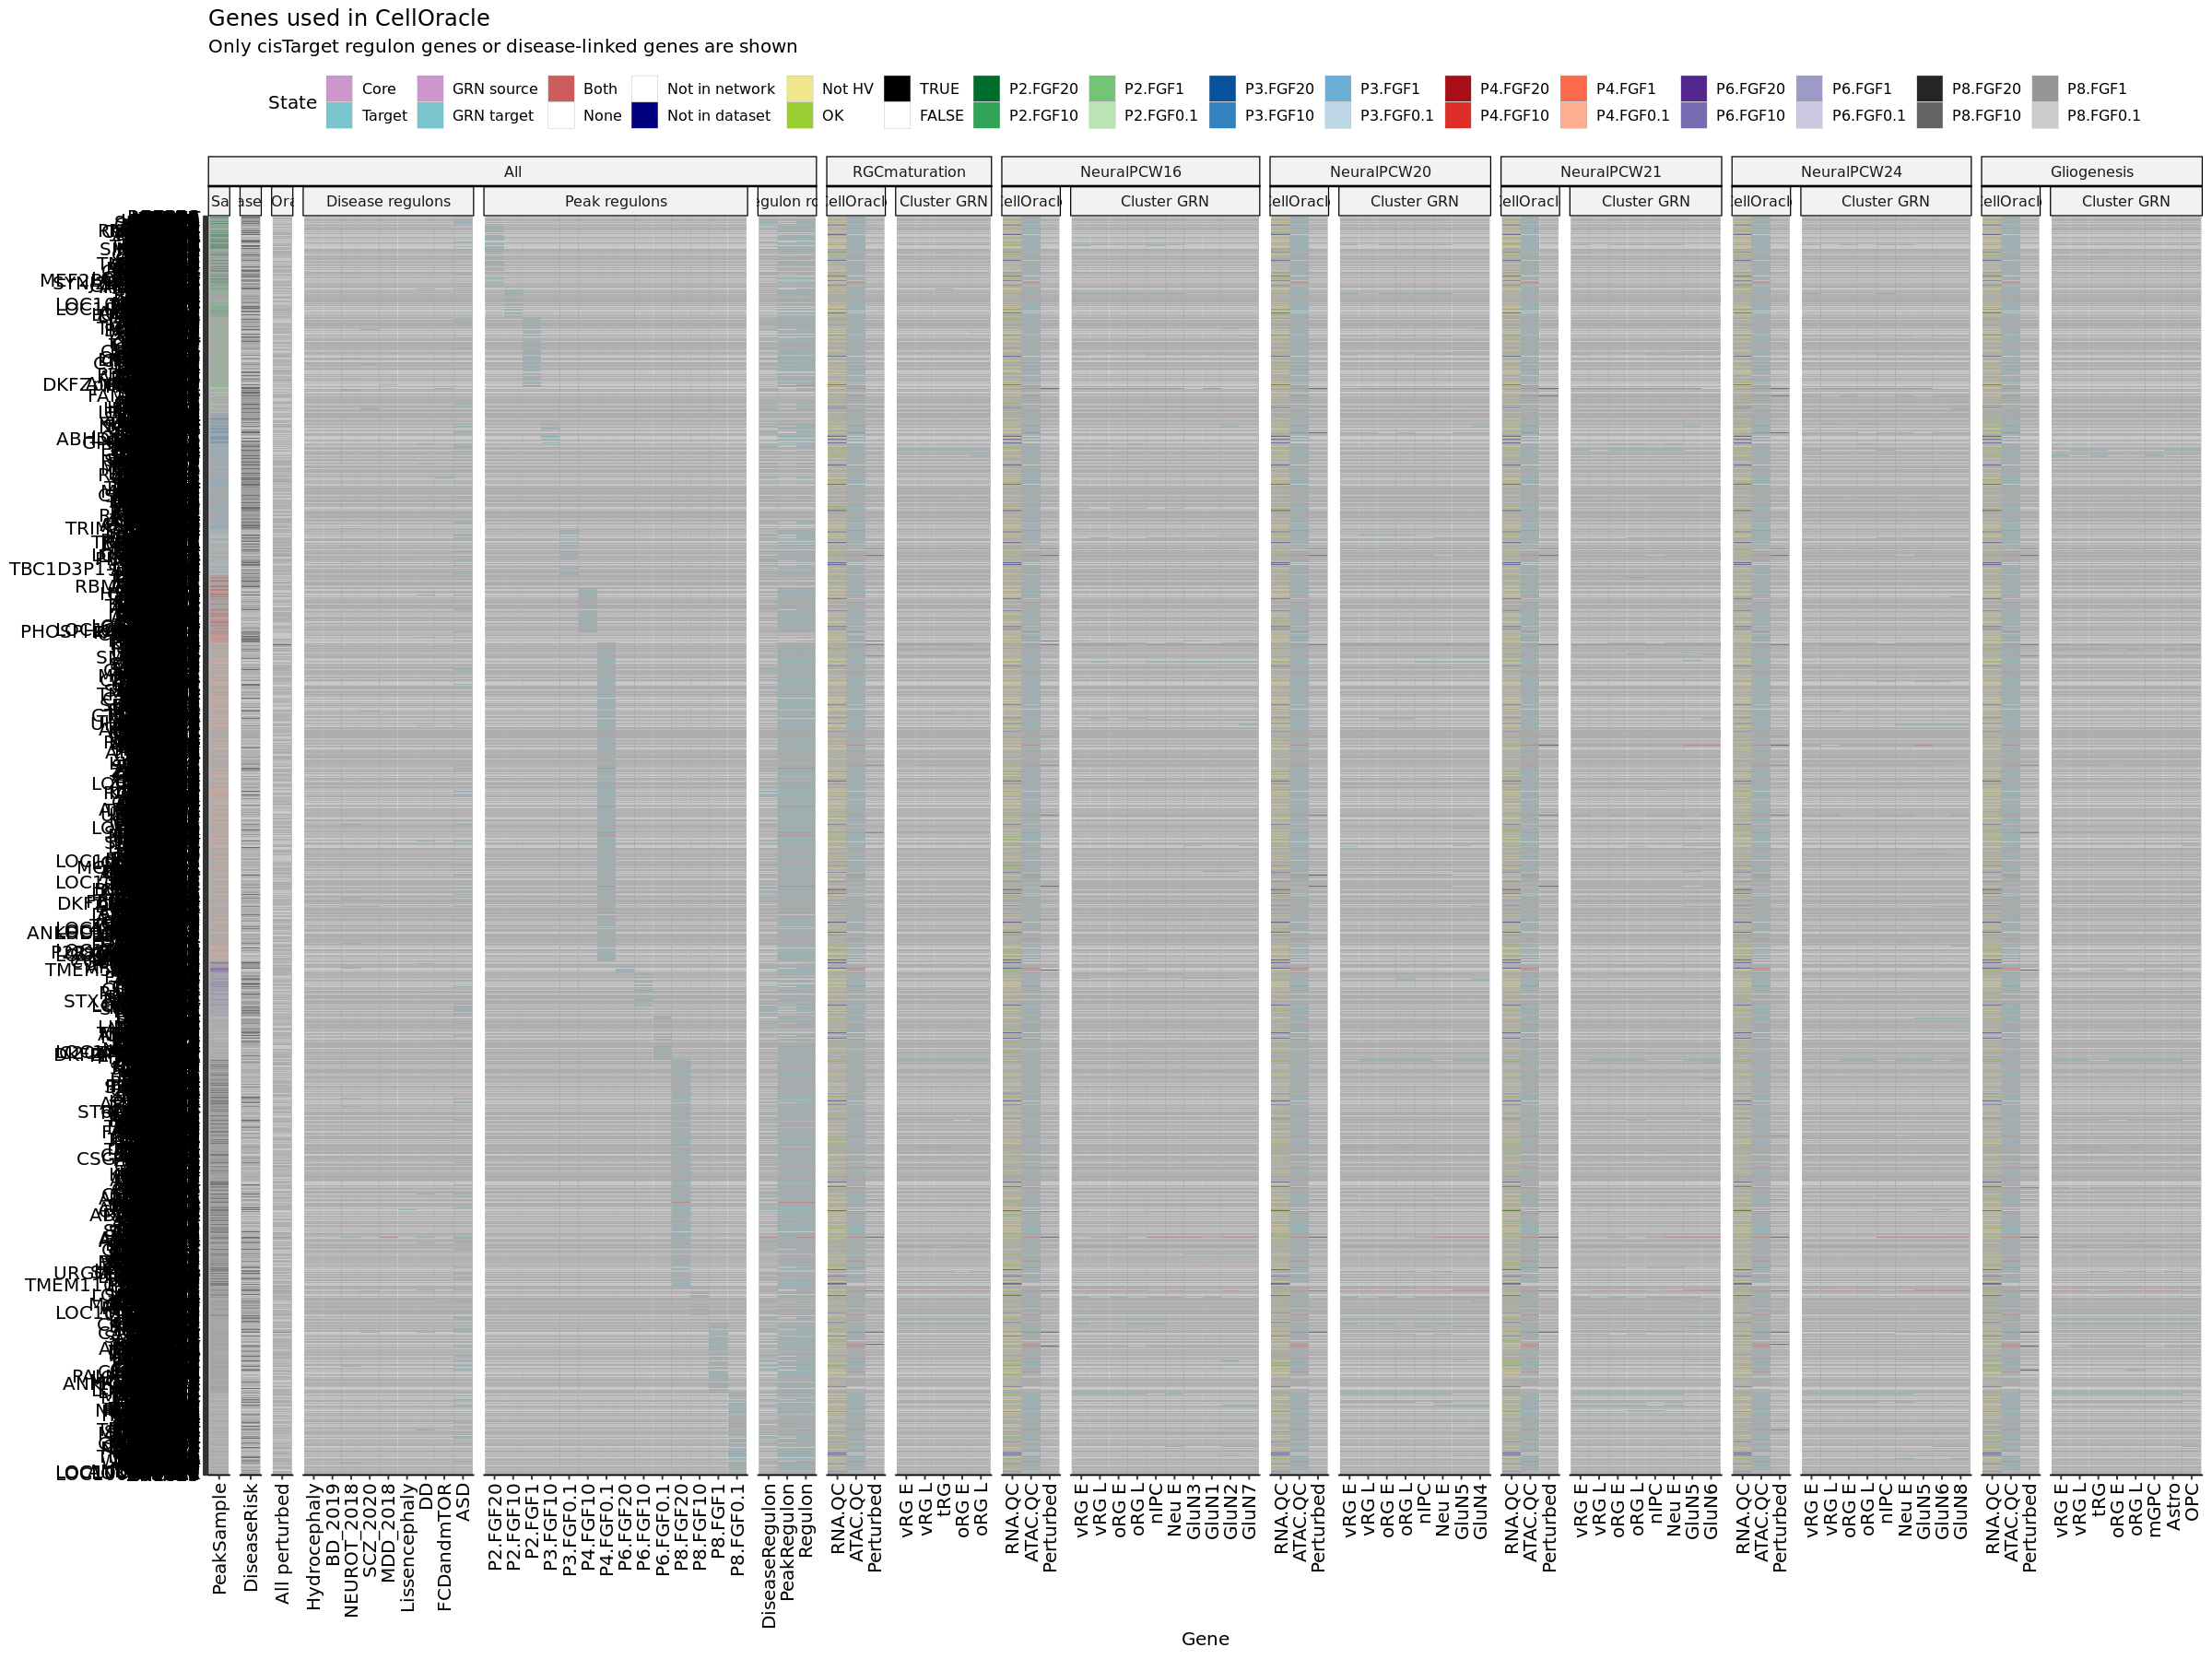

In [116]:
fig(20,15)
p.disriskregs <- ggplot(disriskregs.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
    # x=variable, 
    # y=Gene,
    # fill=value
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
    # facet_nested(cols=vars(Sample,
    #                        var.facet), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.disriskregs <- p.disriskregs + ggtitle('Genes used in CellOracle', subtitle = 'Only cisTarget regulon genes or disease-linked genes are shown')
p.disriskregs

In [117]:
pdf(file = 'GenePresence.DiseaseRiskorRegulon.pdf', width = 20, height=54, useDingbats = F)
p.disriskregs
dev.off()

png 
  2

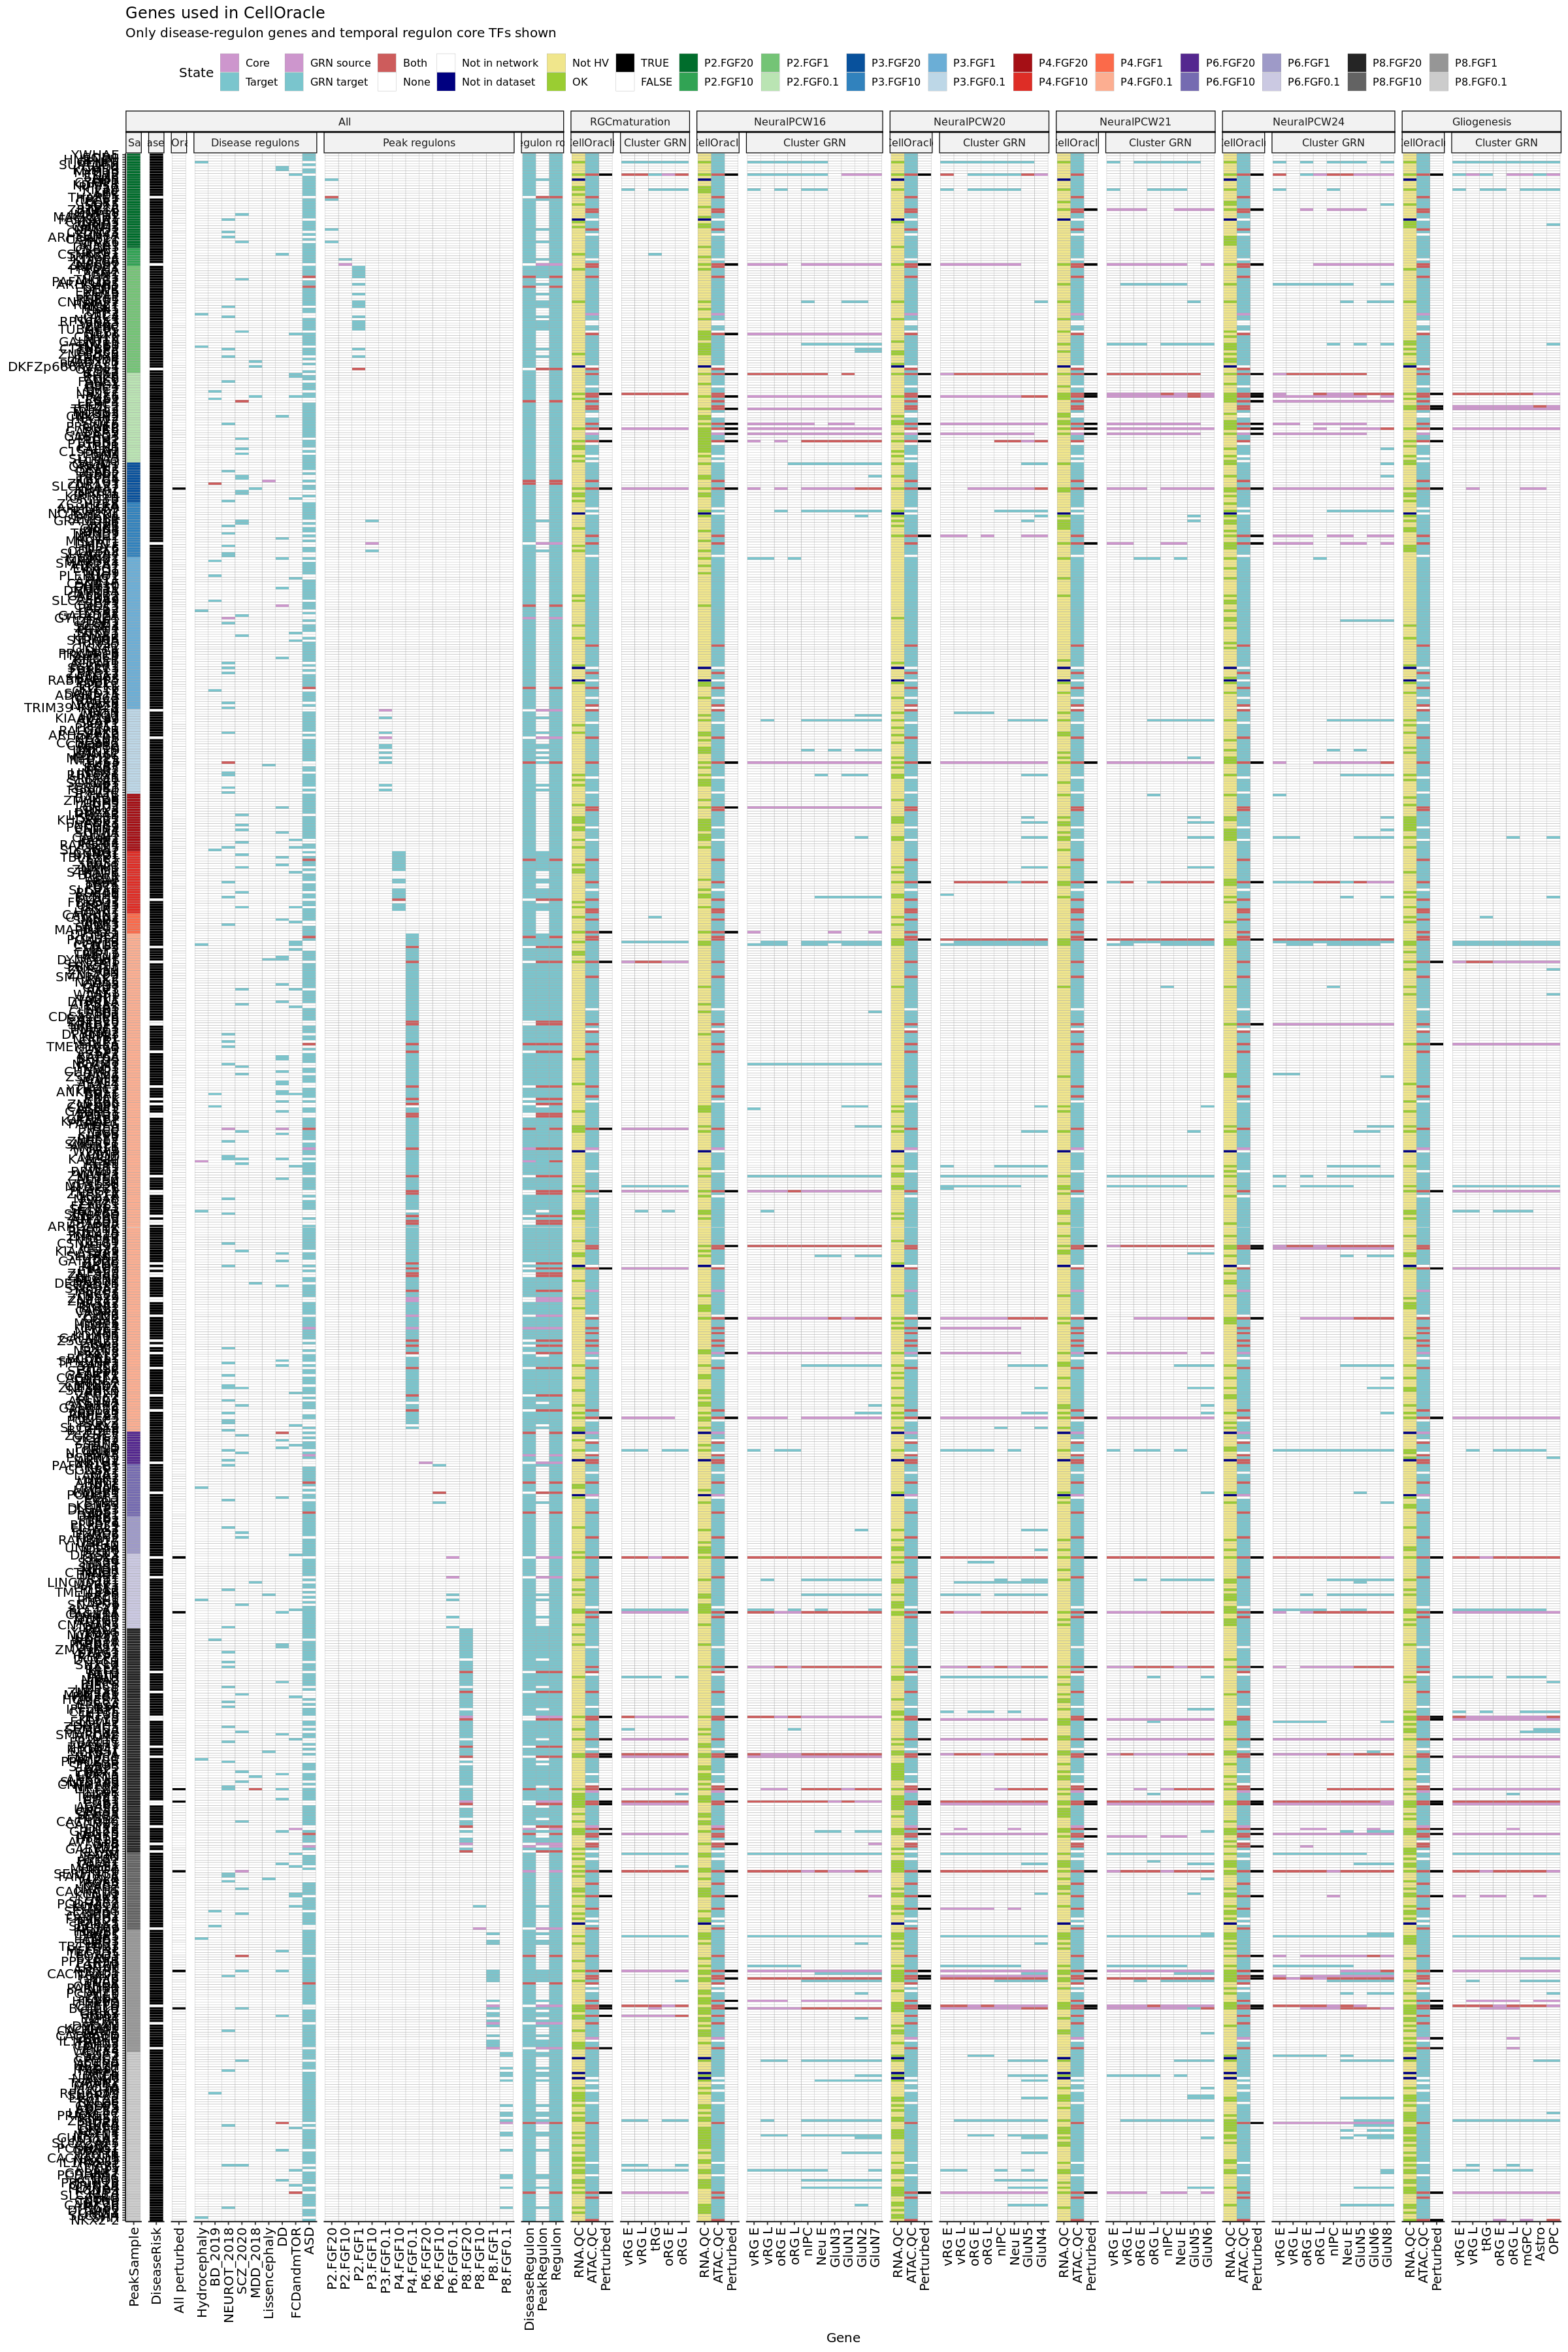

In [118]:
fig(20,30)
p.disregpeakcores <- ggplot(disregpeakcores.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.disregpeakcores <- p.disregpeakcores + ggtitle('Genes used in CellOracle', subtitle = 'Only disease-regulon genes and temporal regulon core TFs shown')
p.disregpeakcores

In [119]:
pdf(file = 'GenePresence.DisReg.PeakCores.pdf', width = 20, height=30, useDingbats = F)
p.disregpeakcores
dev.off()

png 
  2

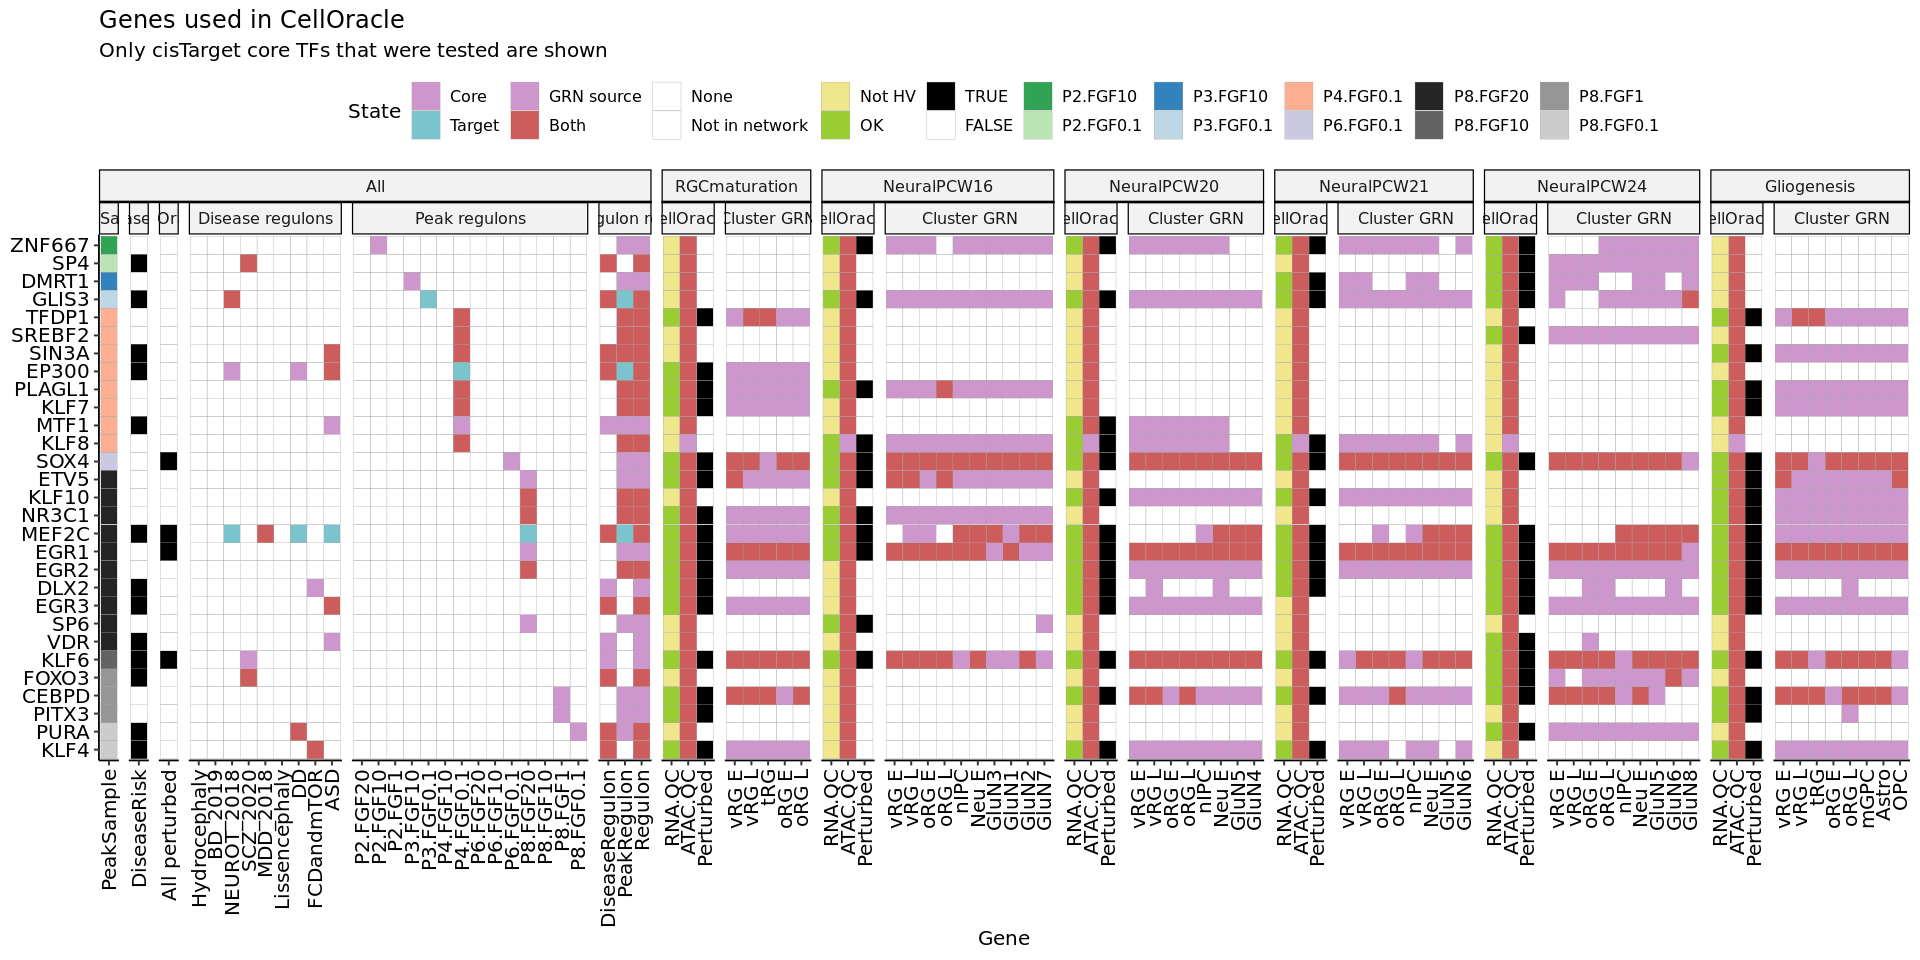

In [120]:
fig(16,8)
p.pertcores <- ggplot(pertcores.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.pertcores <- p.pertcores + ggtitle('Genes used in CellOracle', subtitle = 'Only cisTarget core TFs that were tested are shown')
p.pertcores

In [121]:
pdf(file = 'GenePresence.Cores.Perturbed.pdf', width = 20, height=8, useDingbats = F)
p.pertcores
dev.off()

png 
  2

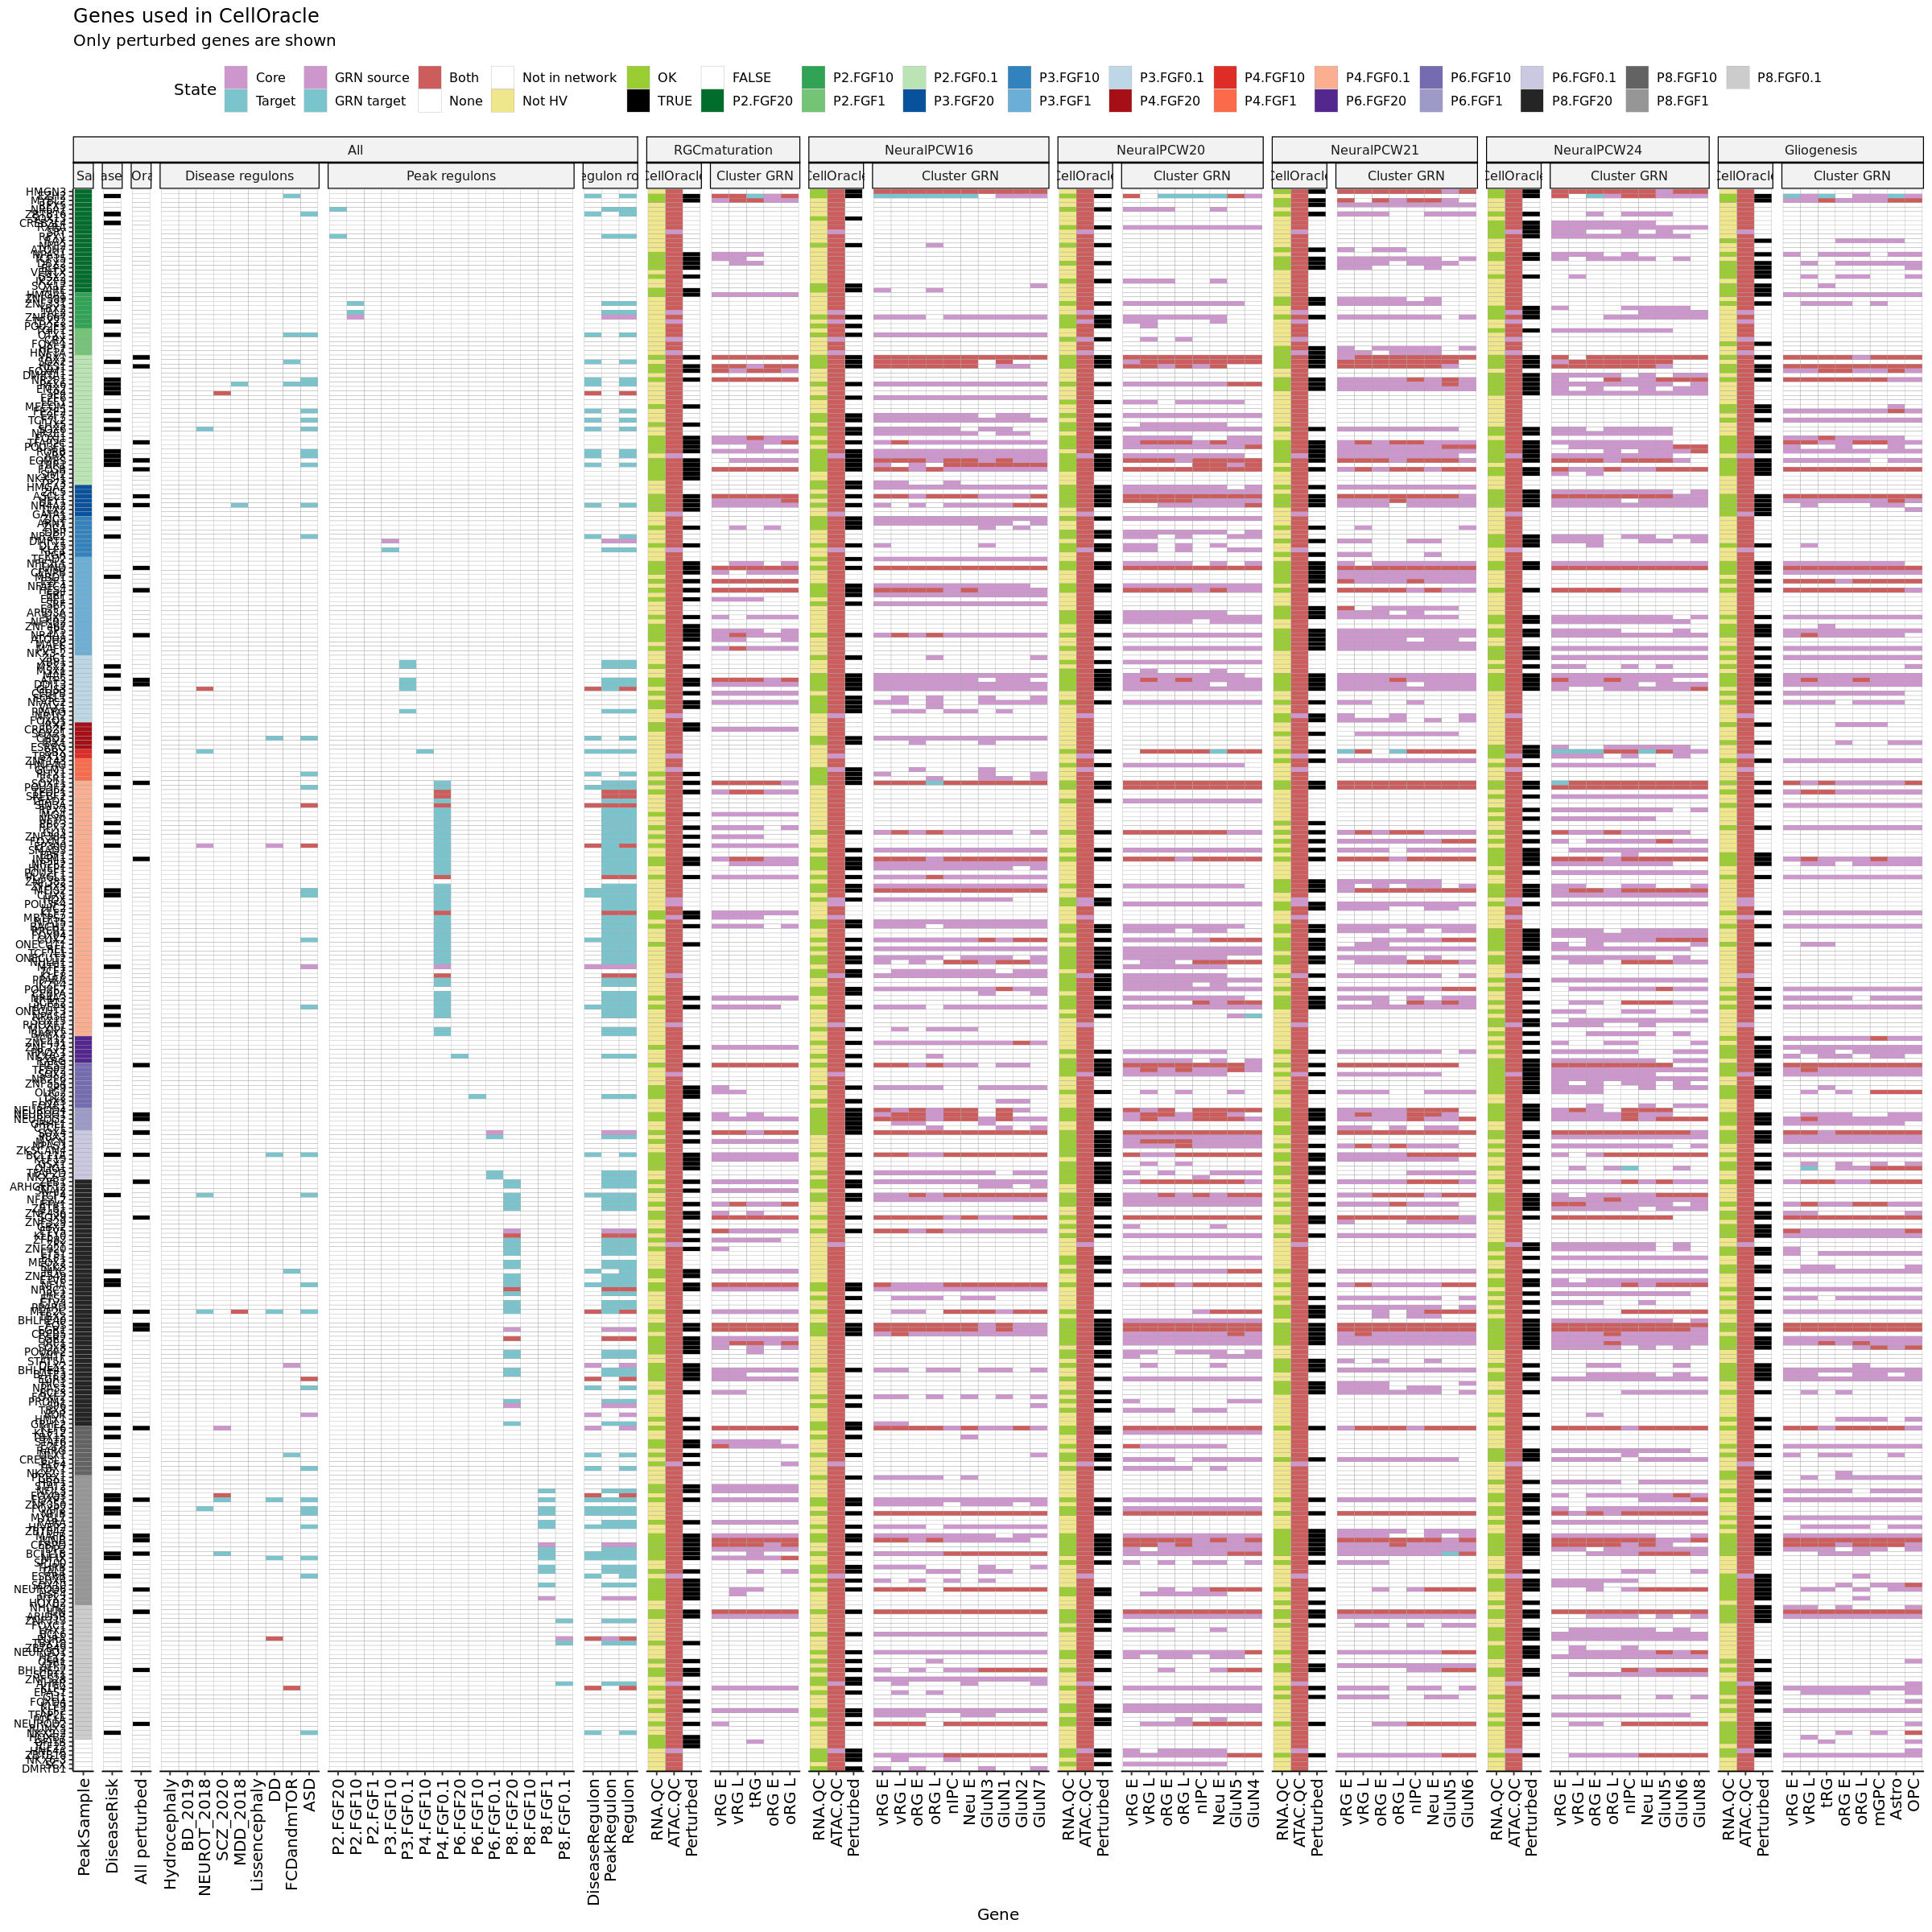

In [122]:
fig(20,20)
p.pert <- ggplot(perturbed.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y = element_text(size=8)
    )
p.pert <- p.pert + ggtitle('Genes used in CellOracle', subtitle = 'Only perturbed genes are shown')
p.pert

In [123]:
pdf(file = 'GenePresence.Perturbed.pdf', width = 20, height=40, useDingbats = F)
p.pert
dev.off()

png 
  2

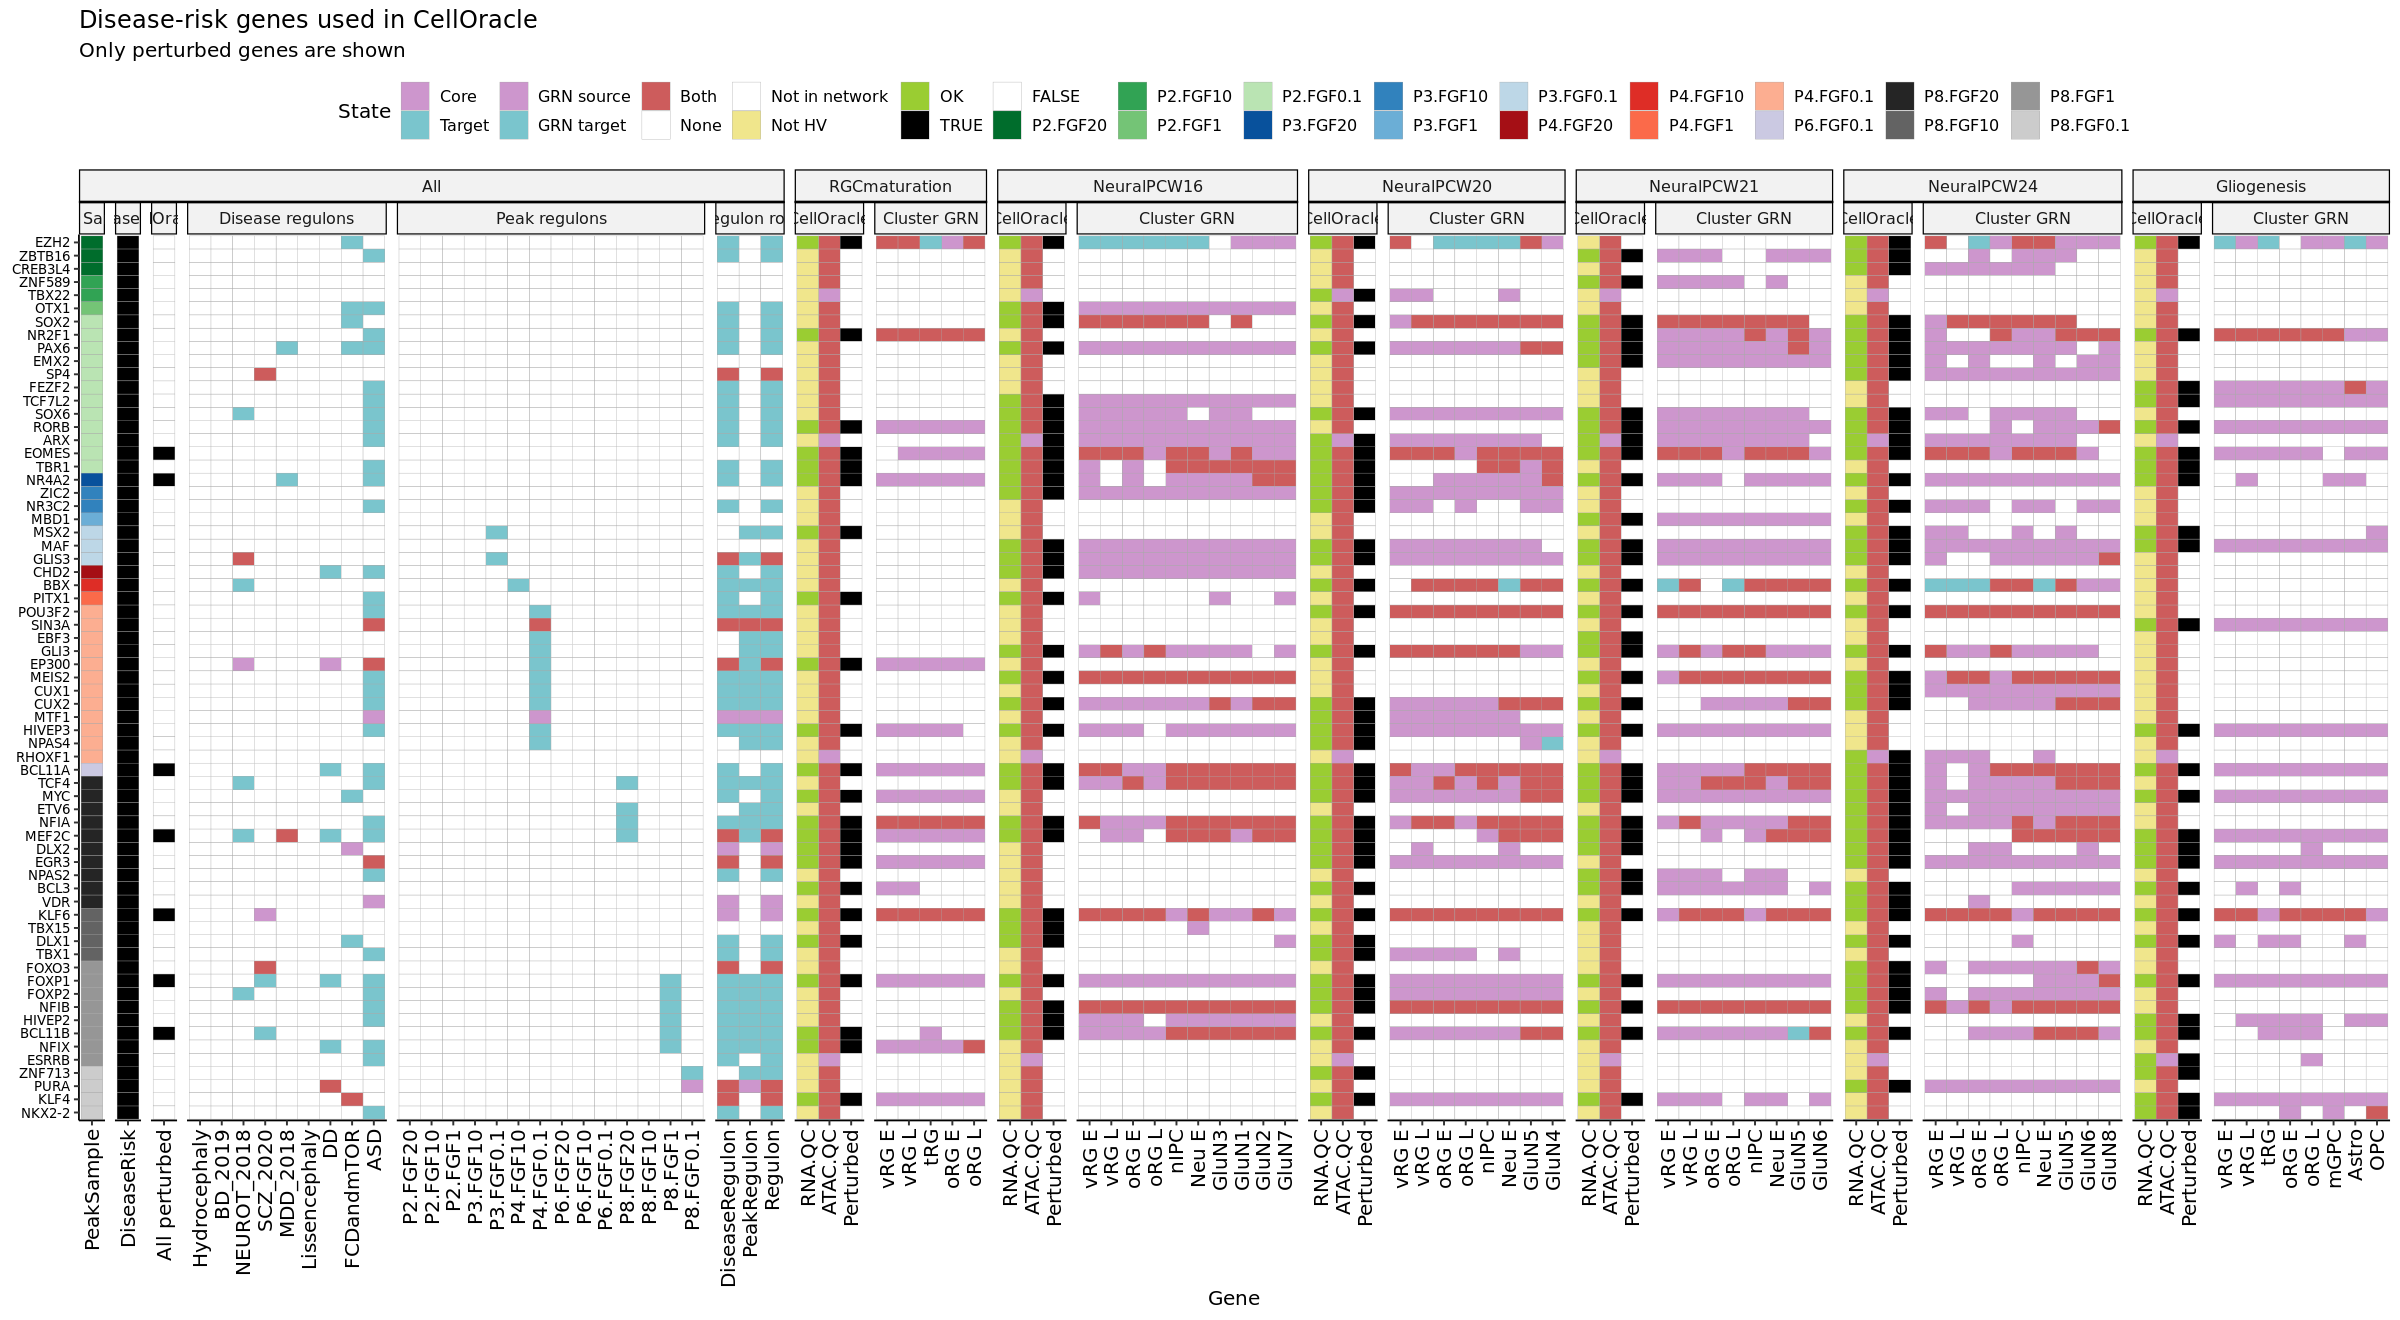

In [124]:
fig(20,11)
p.pertdis <- ggplot(pertdis.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y = element_text(size=8)
    )
p.pertdis <- p.pertdis + ggtitle('Disease-risk genes used in CellOracle', subtitle = 'Only perturbed genes are shown')
p.pertdis

In [125]:
pdf(file = 'GenePresence.Perturbed.DiseaseRisk.pdf', width = 20, height=11, useDingbats = F)
p.pertdis
dev.off()

png 
  2

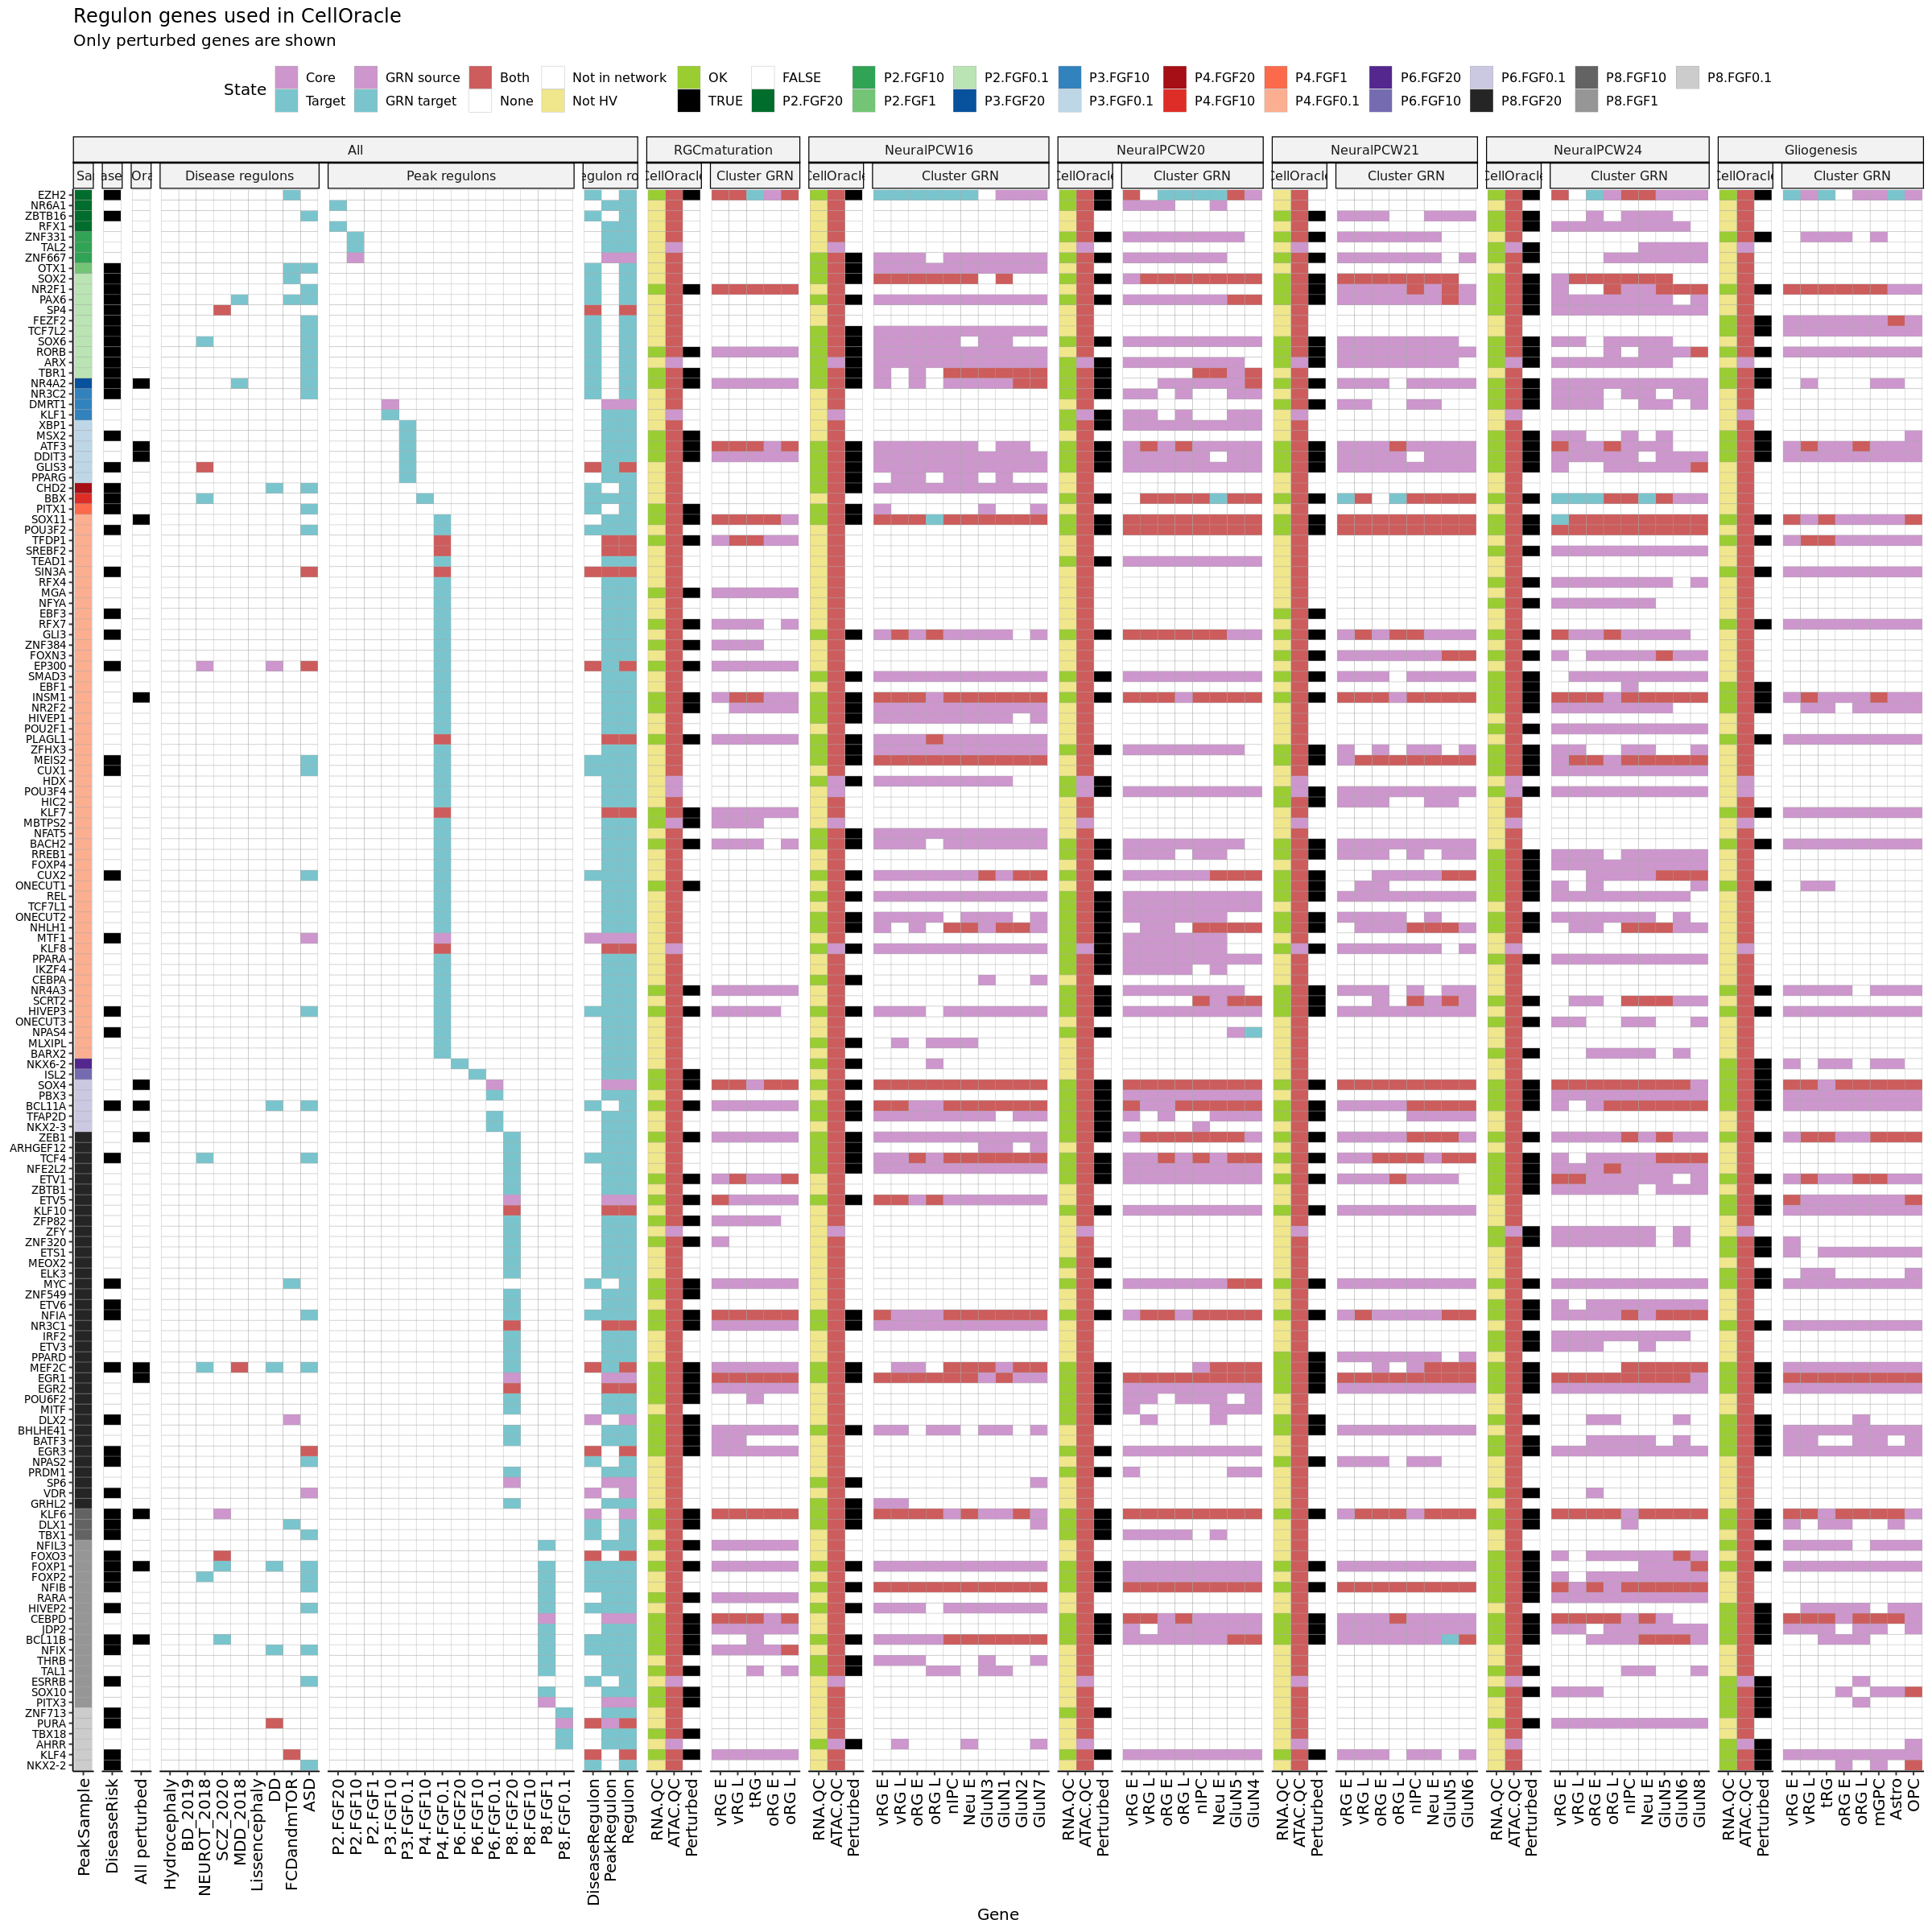

In [126]:
fig(20,20)
p.pertreg <- ggplot(pertreg.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y = element_text(size=8)
    )
p.pertreg <- p.pertreg + ggtitle('Regulon genes used in CellOracle', subtitle = 'Only perturbed genes are shown')
p.pertreg

In [127]:
pdf(file = 'GenePresence.Perturbed.Regulons.pdf', width = 20, height=20, useDingbats = F)
p.pertreg
dev.off()

png 
  2

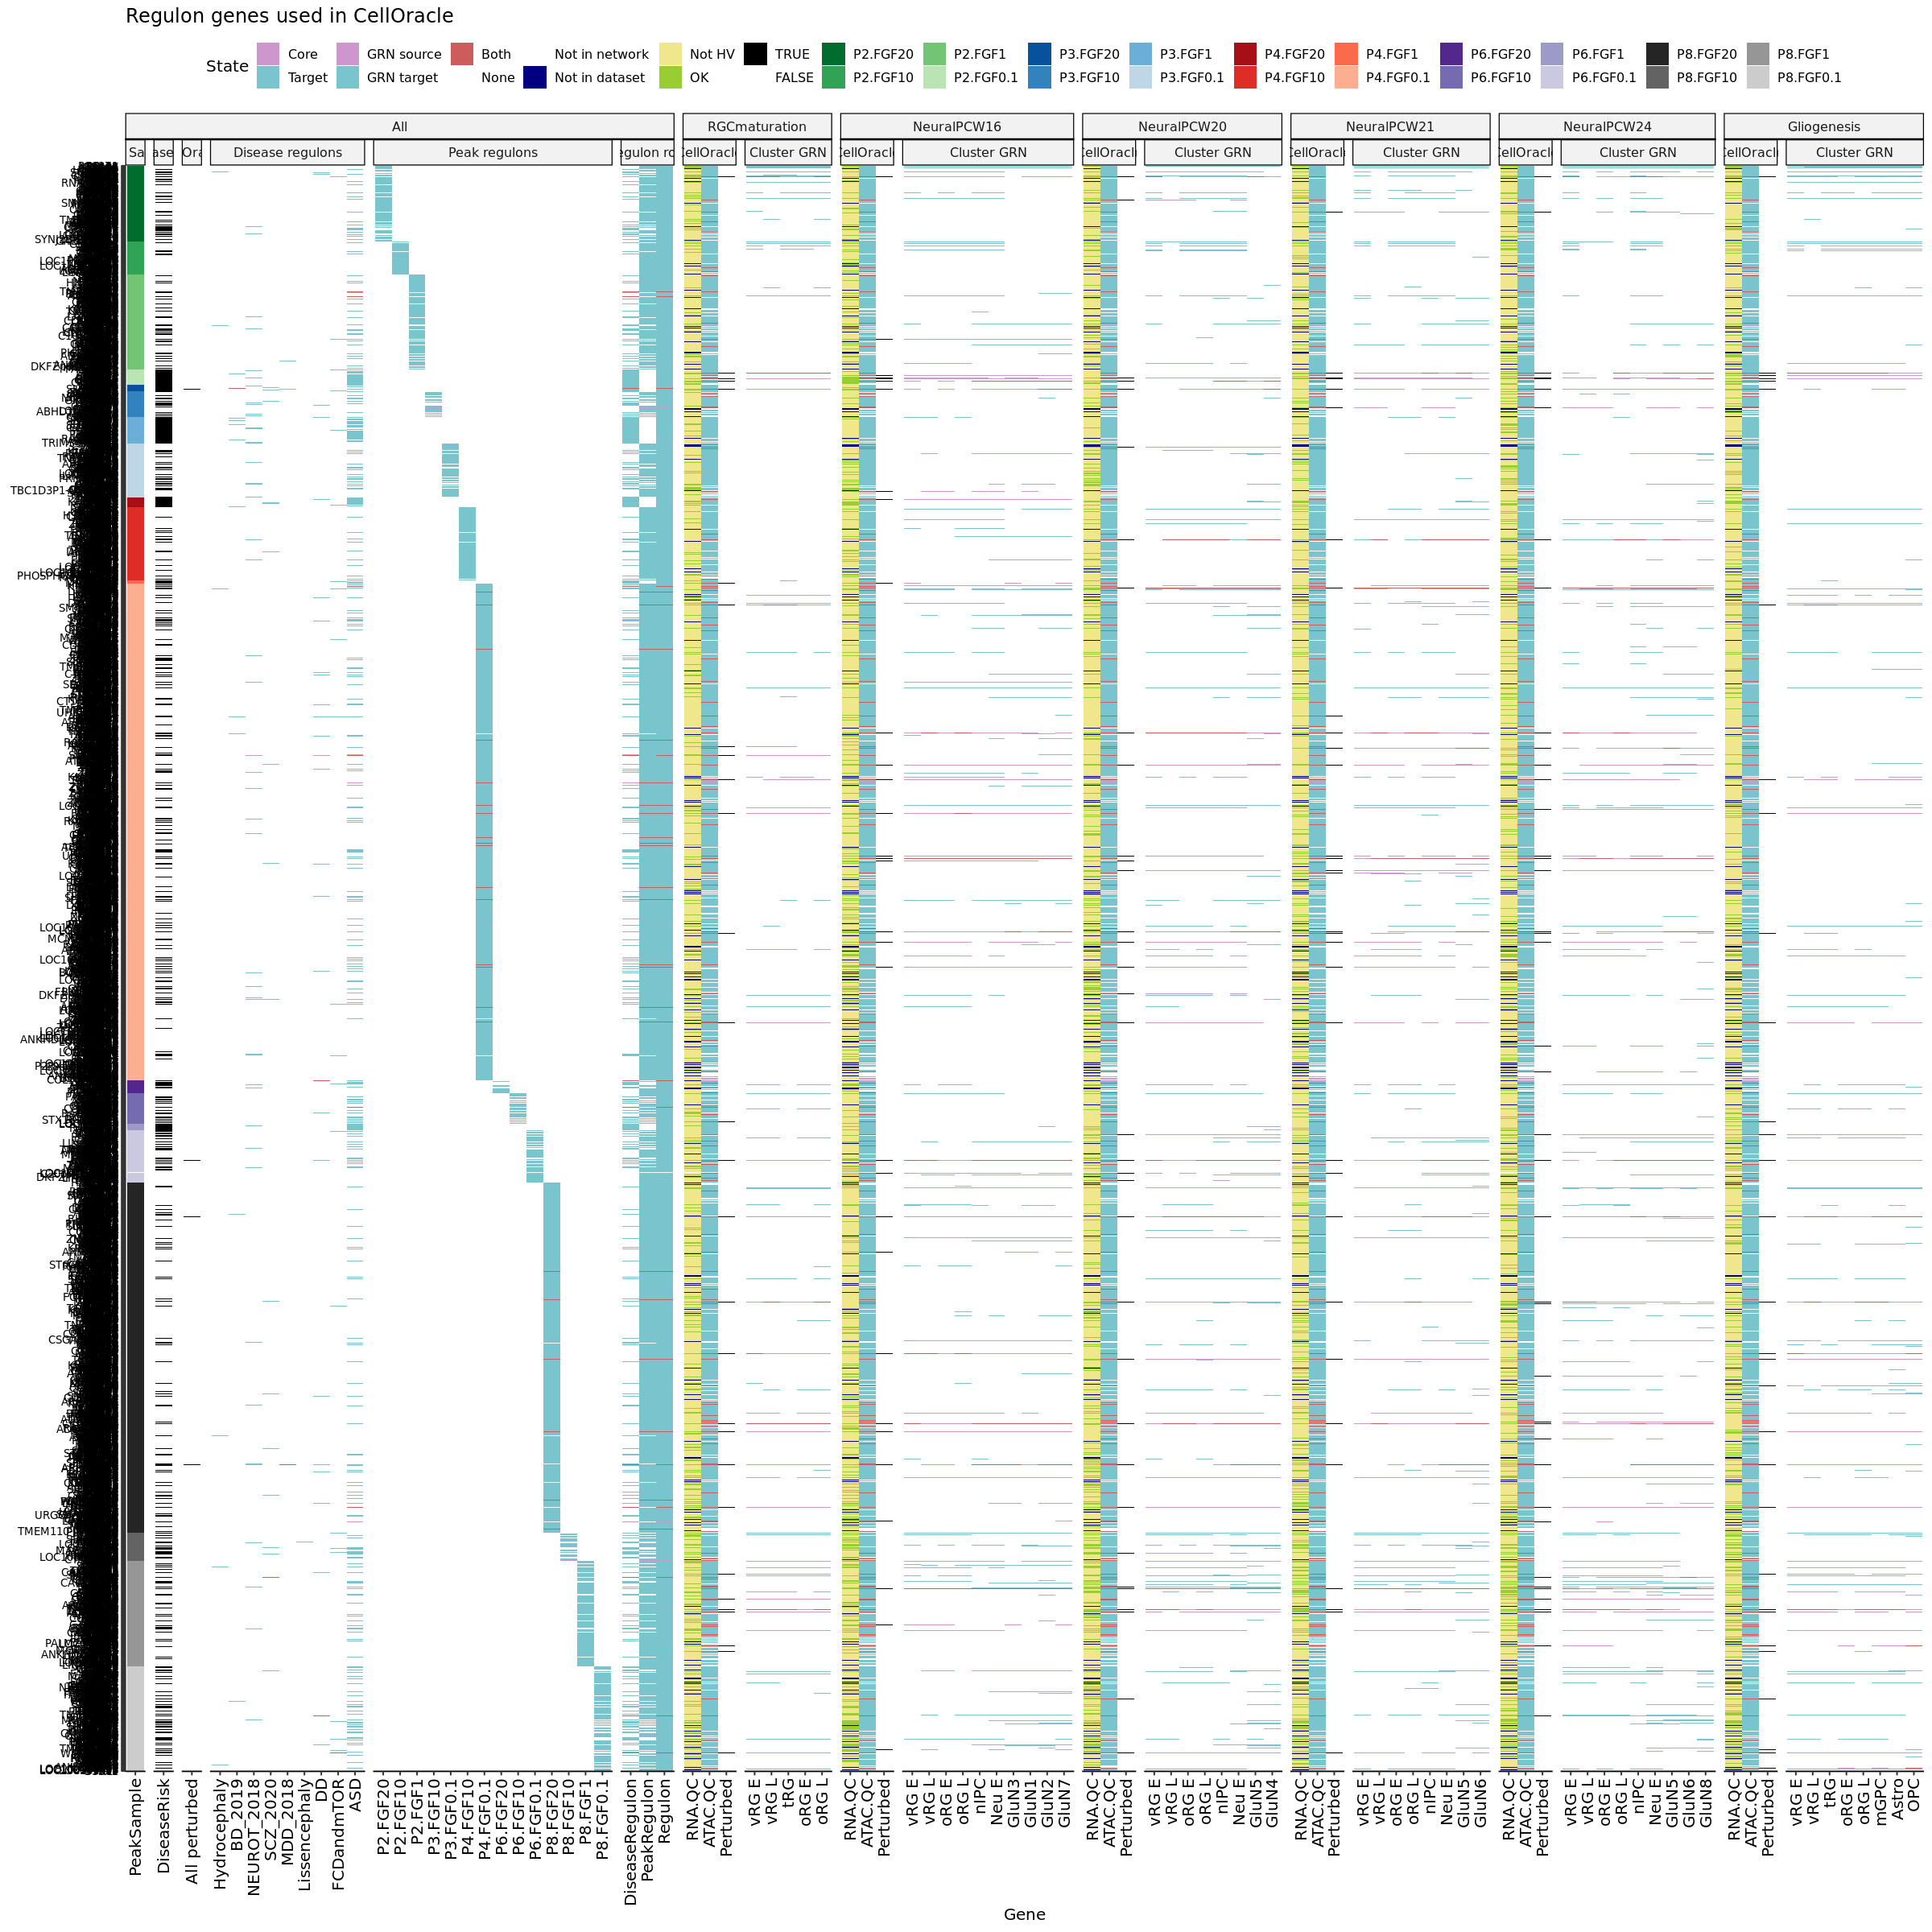

In [128]:
fig(20,20)
p.allreg <- ggplot(allreg.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color=NA) + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y = element_text(size=8)
    )
p.allreg <- p.allreg + ggtitle('Regulon genes used in CellOracle')
p.allreg

In [129]:
pdf(file = 'GenePresence.Regulons.pdf', width = 20, height=54, useDingbats = F)
p.allreg
dev.off()

png 
  2

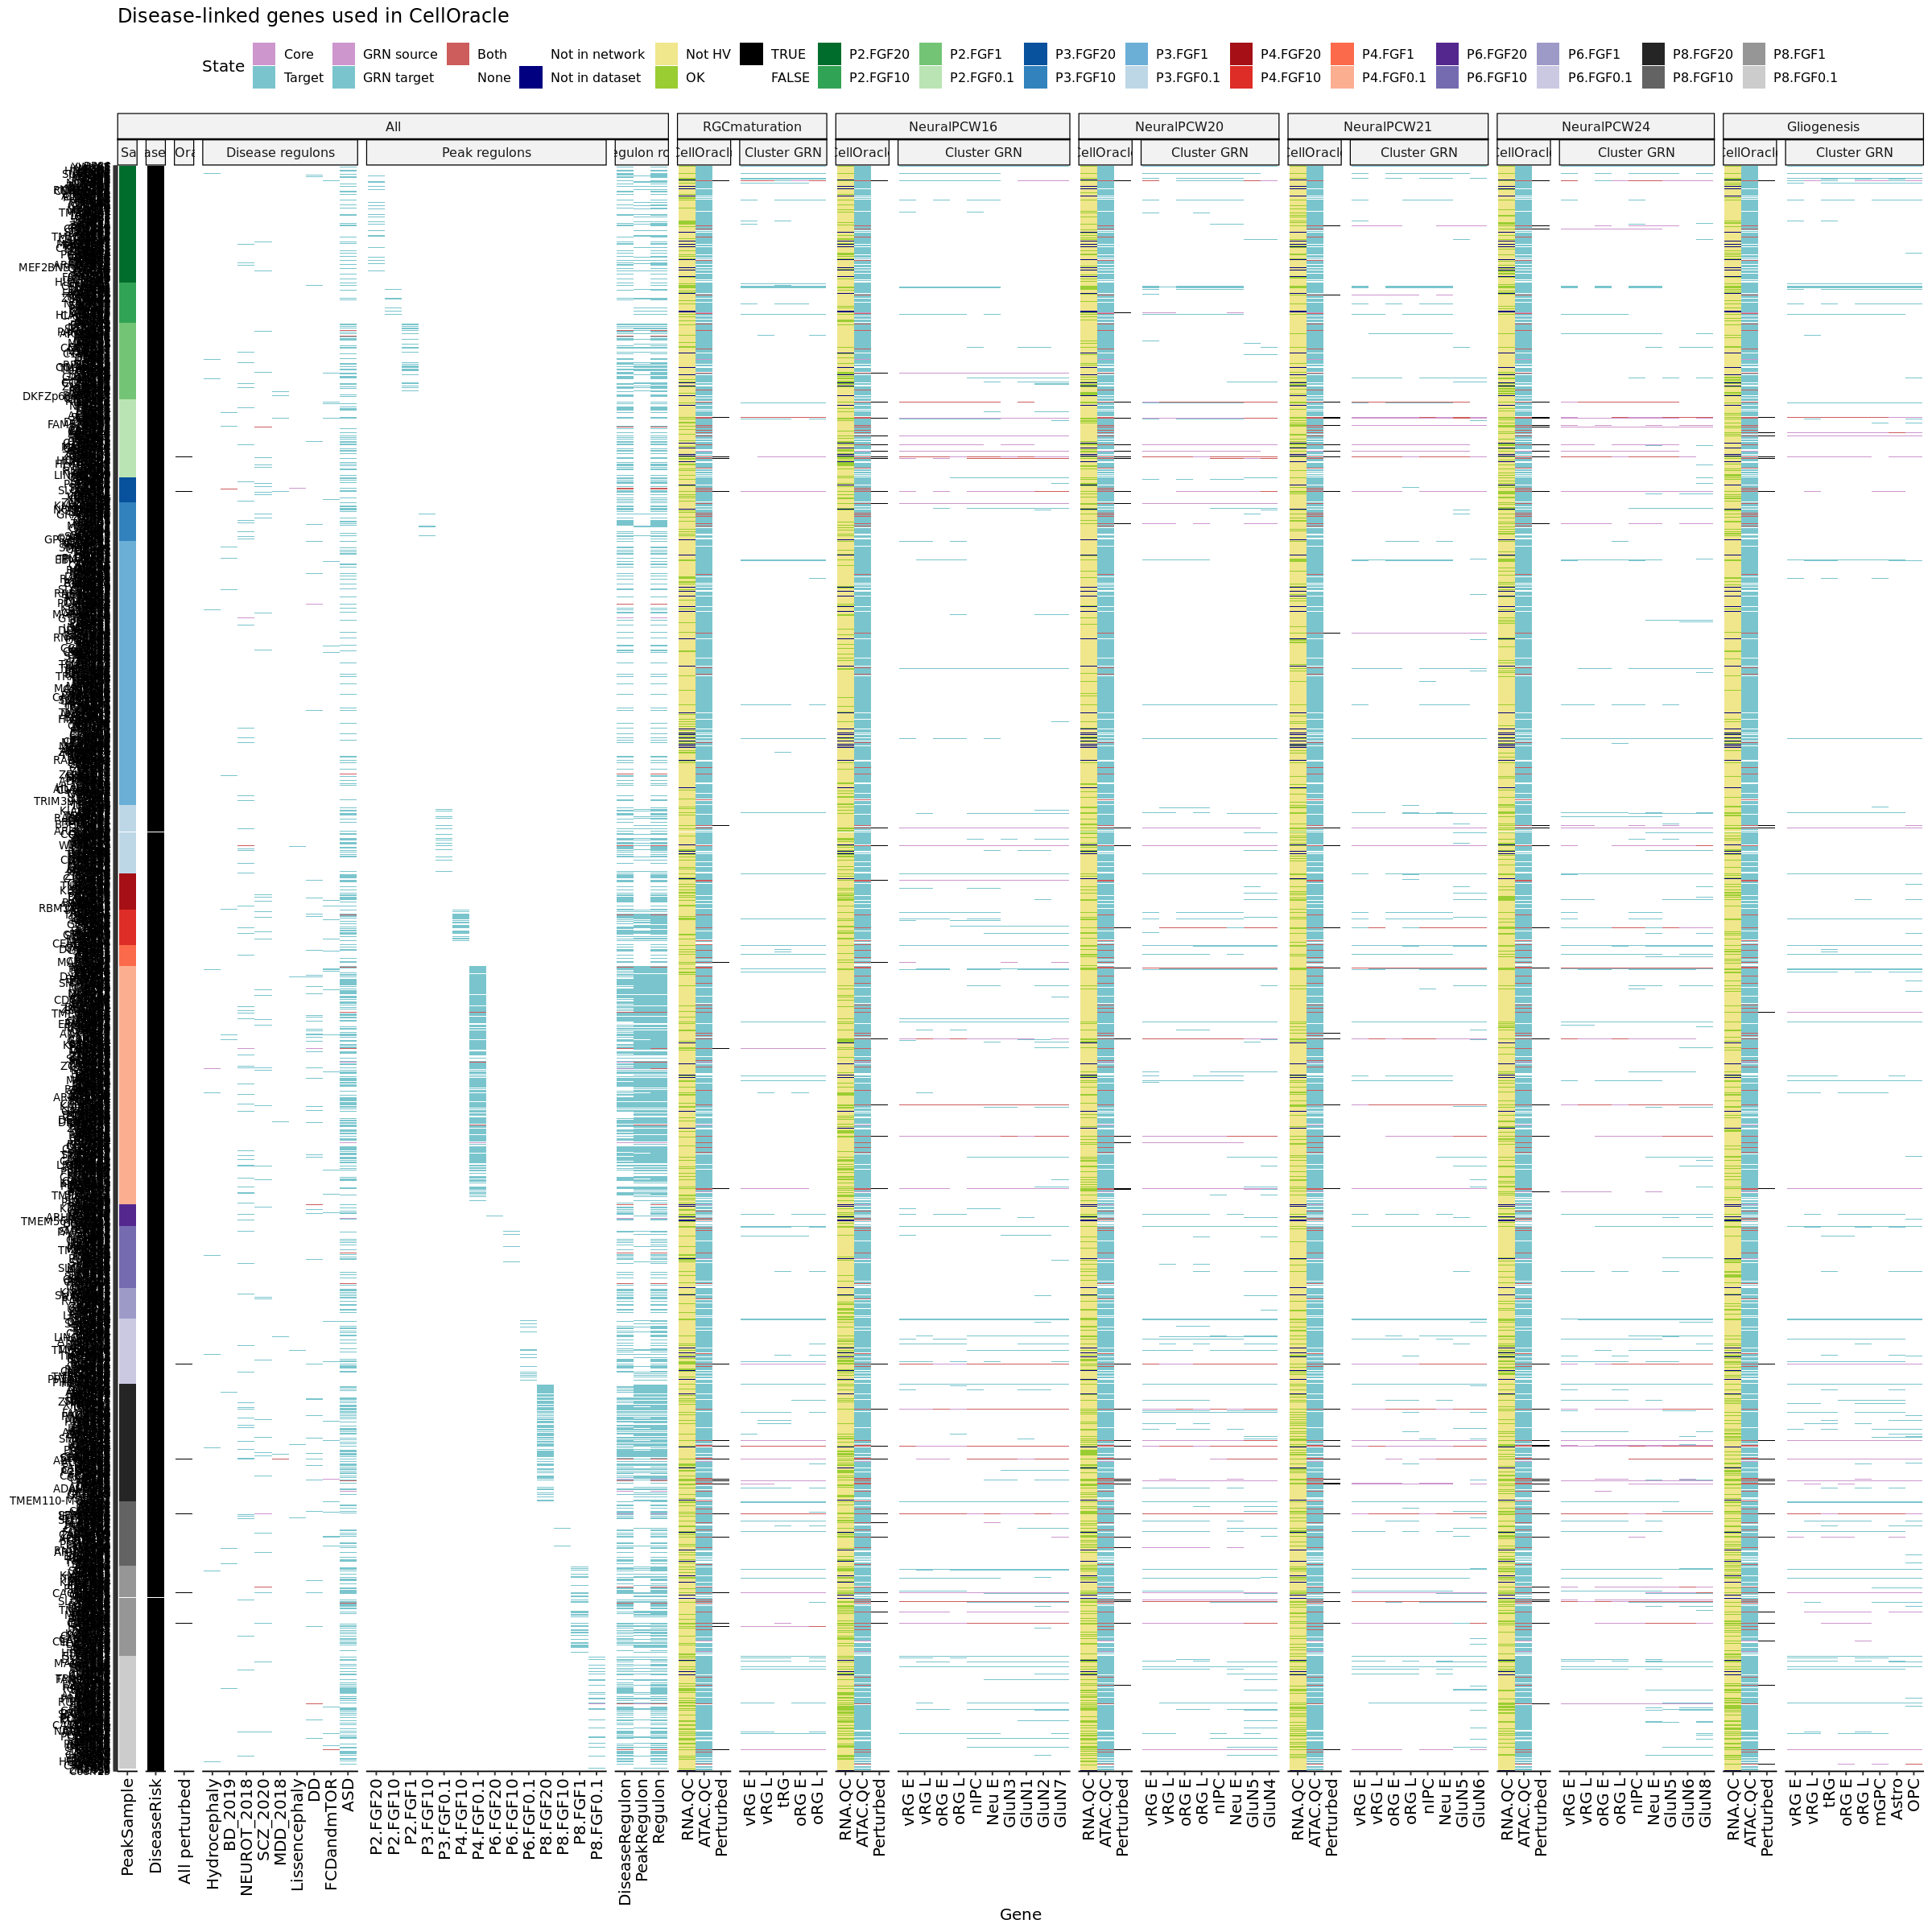

In [130]:
fig(20,20)
p.disrisk <- ggplot(disrisk.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color=NA) + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y = element_text(size=8)
    )
p.disrisk <- p.disrisk + ggtitle('Disease-linked genes used in CellOracle')
p.disrisk

In [131]:
pdf(file = 'GenePresence.DiseaseRisk.pdf', width = 20, height=54, useDingbats = F)
p.disrisk
dev.off()

png 
  2

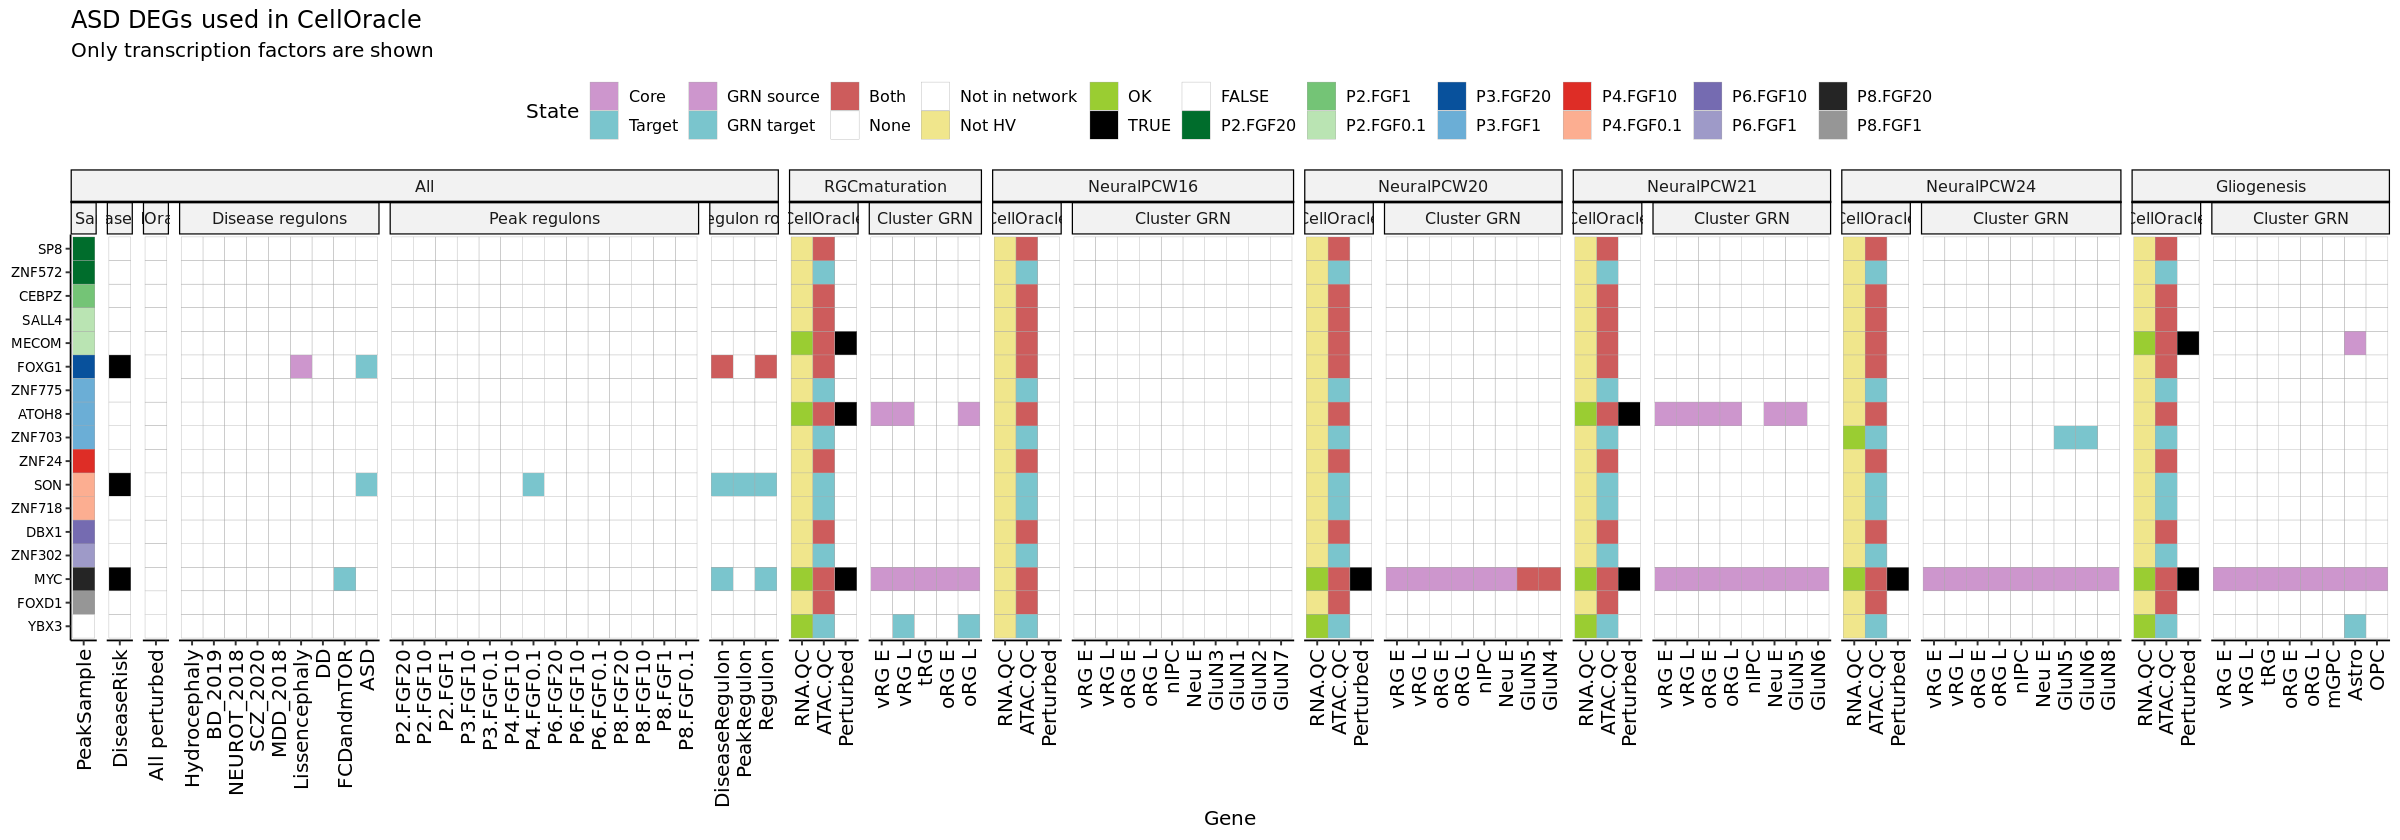

In [60]:
fig(20,7)
p.asd_deg <- ggplot(asd_deg.df, aes(
    x=factor(variable, variable.levels),
    y=factor(Gene, rev(gene.levels[gene.levels%in%unique(Gene)])),
    fill=factor(value, names(val.cols))
)) + 
    facet_nested(cols=vars(factor(Sample, sample.levels),
                           factor(var.facet, facet.levels)), 
                 scales='free', space='free', nest_line=T) + 
    
    geom_tile(color='darkgrey') + 
    scale_fill_manual('State', values=val.cols,) + 

    labs(x='Gene', y=NULL) +

    labs_pubr() + theme_pubr(base_family = 'ArialMT') + 

    guides(fill= guide_legend(nrow = 2)) +

    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y = element_text(size=8)
    )
p.asd_deg <- p.asd_deg + ggtitle('ASD DEGs used in CellOracle', subtitle = 'Only transcription factors are shown')
p.asd_deg

In [62]:
pdf(file = 'GenePresence.ASD_DEG.pdf', width = 20, height=7, useDingbats = F)
p.asd_deg
dev.off()

png 
  2